#                                       Facilitamos tu traslado a Ginebra 

## Introducción
Ginebra, una ciudad vibrante situada a orillas del Lago Lemán, es el epicentro de la diplomacia global y hogar de numerosas organizaciones internacionales como las Naciones Unidas y la Cruz Roja. Con su rica historia, cultura diversa y calidad de vida excepcional, Ginebra atrae a profesionales, nómadas digitales y estudiantes de intercambio de todo el mundo. 
Nuestra agencia de élite se dedica a facilitar la integración de estos individuos, proporcionando apoyo integral en documentación y selección de alojamientos de calidad. A través de nuestra investigación y uso de datos, garantizamos que cada cliente encuentre el hogar perfecto durante su estancia en esta ciudad cosmopolita.

## Objetivo del estudio
El objetivo de nuestro estudio es mejorar la selección de alojamientos en Ginebra para nuestros clientes mediante el uso de datos de Inside Airbnb. 
Nos enfocamos en identificar a los superhosts, aquellos anfitriones que ofrecen experiencias excepcionales, para asegurar que nuestros clientes, disfruten de una estancia cómoda y satisfactoria.
Utilizando el análisis de datos, buscamos optimizar nuestra capacidad para recomendar los mejores alojamientos, elevando así la calidad del servicio que ofrecemos y garantizando una integración fluida y placentera en Ginebra.

## Estudio de Alquiler en Airbnb en la ciudad de Geneve

Ginebra, una de las ciudades más caras del mundo según el Economist Intelligence Unit (EIU), se sitúa en el Top 3 junto a Nueva York en el estudio anual de Worldwide Cost of Living. Este ranking refleja la fortaleza del franco suizo y los altos precios de alimentos, artículos domésticos y ocio. 
Nuestra agencia de élite facilita la integración de profesionales, nómadas digitales y estudiantes de intercambio en Ginebra, ofreciendo apoyo integral en documentación y selección de alojamientos de calidad. A través de nuestro estudio, identificamos Super-hosts para asegurar que nuestros clientes encuentren el hogar perfecto y se adapten mejor a los altos costos de vida. 
(Fuente: https://www.eiu.com/n/campaigns/worldwide-cost-of-living-2023/)

Los datos que analizaré fueron extraídos de https://insideairbnb.com/ y las bases fueron actualizadas por última vez el 27 de diciembre, 2023. 

Los archivos a utilizar de `Geneva, Switzerland` son:

* `listings.csv.gz`: Detailed Listings data
* `calendar.csv.gz`: Detailed Calendar Data
* `reviews.csv.gz`:	Detailed Review Data
* `listings.csv`: Summary information and metrics for listings in Geneva (good for visualisations).
* `reviews.csv`: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
* `neighbourhoods.csv`:	Neighbourhood list for geo filter. Sourced from city or open source GIS files.
* `neighbourhoods.geojson`:	GeoJSON file of neighbourhoods of the city.

# Regulaciones de Airbnb en Suiza

Tanto Suiza en general como la ciudad de Ginebra tienen regulaciones específicas respecto a Airbnb y el alquiler de apartamentos. 
A continuación un resumen de esas regulaciones: 

### Suiza (a nivel nacional)

1. *Registro y Licencias*:
   - En algunas regiones, los anfitriones deben registrarse y obtener licencias para alquilar propiedades a corto plazo.

2. *Restricciones de Tiempo*:
   - Algunas ciudades imponen límites en el número de días que una propiedad puede ser alquilada a corto plazo cada año.

3. *Impuestos*:
   - Los ingresos obtenidos a través de plataformas como Airbnb están sujetos a impuestos locales y federales. Los anfitriones deben declarar estos ingresos y pueden estar sujetos al IVA (Impuesto sobre el Valor Añadido).

4. *Normativas de Seguridad y Salud*:
   - Las propiedades deben cumplir con ciertos estándares de seguridad y salud, incluyendo requisitos de incendios y salidas de emergencia.

5. *Aprobación de Vecinos*:
   - En algunos cantones, se requiere el consentimiento de los vecinos o del edificio para alquilar propiedades a corto plazo.

### Ginebra

1. *Registro Obligatorio*:
   - Los anfitriones en Ginebra deben registrar su propiedad con las autoridades locales antes de alquilarla a través de plataformas como Airbnb.

2. *Límites de Días*:
   - Ginebra impone un límite de 90 días por año en el alquiler de una propiedad principal a corto plazo.

3. *Impuestos Turísticos*:
   - El impuesto turístico en Ginebra es de aproximadamente 3.75 CHF (3.87 Euros) por persona y por noche para reservas de menos de 40 días. Este impuesto se recauda de los huéspedes y debe ser remitido a la Oficina de Turismo de Ginebra.

4. *Regulaciones de Zonificación*:
   - Deben respetarse las normativas de zonificación locales, que pueden limitar el tipo y la cantidad de propiedades que se pueden alquilar a corto plazo en determinadas áreas.

5. *Requisitos de Información*:
   - Los anfitriones deben proporcionar información clara y completa sobre la propiedad, incluyendo el precio total, las condiciones de alquiler y cualquier otra tarifa aplicable.

6. *Cumplimiento de la Normativa de Edificios*:
   - Las propiedades deben cumplir con las regulaciones locales de edificios, incluyendo estándares de seguridad y accesibilidad.


## 1. Importar bases, datos y librerias

### 1.a Importar Librerias

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### 1.b Importar Bases

#### Listings

In [100]:
#Data de Listings resumida en 18 columnas
df_listings = pd.read_csv('listings.csv')

print(df_listings.head(5))

       id                                               name  host_id  \
0   42515  Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...   185647   
1  107438  Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...   556499   
2  203997  Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...  1001280   
3  276025  Rental unit in Versoix · ★4.62 · 1 bedroom · 4...  1442438   
4  338682  Rental unit in Geneva · ★4.81 · 1 bedroom · 1 ...  1001280   

  host_name  neighbourhood_group      neighbourhood  latitude  longitude  \
0    Noelle                  NaN  Commune de Genève  46.20198    6.15672   
1     F. M.                  NaN  Commune de Genève  46.18905    6.16154   
2      Mike                  NaN  Commune de Genève  46.19964    6.15580   
3      Gaby                  NaN            Versoix  46.28031    6.16833   
4      Mike                  NaN  Commune de Genève  46.20708    6.15545   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room   89.0   

In [101]:
print(df_listings.shape)
df_listings.columns

(2521, 18)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [102]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2521 non-null   int64  
 1   name                            2521 non-null   object 
 2   host_id                         2521 non-null   int64  
 3   host_name                       2521 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2521 non-null   object 
 6   latitude                        2521 non-null   float64
 7   longitude                       2521 non-null   float64
 8   room_type                       2521 non-null   object 
 9   price                           2127 non-null   float64
 10  minimum_nights                  2521 non-null   int64  
 11  number_of_reviews               2521 non-null   int64  
 12  last_review                     19

In [103]:
#Data de Listing Detallada en 74 columnas
listings_details = pd.read_csv("listings.csv.gz", index_col= "id", low_memory=False)
print(listings_details.shape)
listings_details.columns

(2521, 74)


Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [104]:
print(listings_details.head(5))

                                listing_url       scrape_id last_scraped  \
id                                                                         
42515    https://www.airbnb.com/rooms/42515  20231227030725   2023-12-27   
107438  https://www.airbnb.com/rooms/107438  20231227030725   2023-12-27   
203997  https://www.airbnb.com/rooms/203997  20231227030725   2023-12-27   
276025  https://www.airbnb.com/rooms/276025  20231227030725   2023-12-27   
338682  https://www.airbnb.com/rooms/338682  20231227030725   2023-12-27   

             source                                               name  \
id                                                                       
42515   city scrape  Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...   
107438  city scrape  Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...   
203997  city scrape  Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...   
276025  city scrape  Rental unit in Versoix · ★4.62 · 1 bedroom · 4...   
338682  city scrape  Re

#### Neighbourhoods

In [105]:
#Data del vecindario
df_neigh = pd.read_csv('neighbourhoods.csv')
print(df_neigh.shape)
df_neigh
#son 45 barrios/vecindarios en Ginebra

(45, 2)


,neighbourhood_group,neighbourhood
0,NaN,Aire-la-Ville
1,NaN,Anières
2,NaN,Avully
3,NaN,Avusy
4,NaN,Bardonnex
5,NaN,Bellevue
6,NaN,Bernex
7,NaN,Carouge
8,NaN,Cartigny
9,NaN,Céligny


In [106]:
import geopandas as gpd
import folium
from IPython.display import display

# Cargar el archivo GeoJSON
geojson_file = r'C:\Users\nanyo\Upgrade\Temario\Modulo_2\EjercicioFinModulo2\neighbourhoods.geojson'  # Asegúrate de cambiar esta ruta a la ruta correcta de tu archivo
gdf = gpd.read_file(geojson_file)

# Crear un mapa centrado en una ubicación específica
centroid = gdf.geometry.centroid[0]
mapa = folium.Map(location=[centroid.y, centroid.x], zoom_start=12)

# Añadir el GeoJSON al mapa
folium.GeoJson(gdf).add_to(mapa)

# Mostrar el mapa en el cuaderno Jupyter
display(mapa)

C:\Users\nanyo\AppData\Local\Temp\ipykernel_45824\3938301881.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid[0]


#### Reviews

In [107]:
#Data de los comentarios resumida en n° de la propiedad y fecha del review
df_rev = pd.read_csv('reviews.csv')
print(df_rev.shape)
df_rev

(64519, 2)


,listing_id,date
0,42515,2011-09-24
1,42515,2012-05-17
2,42515,2012-05-27
3,42515,2012-09-21
4,42515,2013-02-19
...,...,...
64514,1009343577337596471,2023-12-08
64515,1010042554774265839,2023-11-11
64516,1010042554774265839,2023-12-03
64517,1010042554774265839,2023-12-12


In [108]:
#Data de los comentarios detallada 
rev_details = pd.read_csv("reviews.csv.gz", parse_dates=['date'])
print(rev_details.shape)
rev_details

(64519, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,42515,563807,2011-09-24,997025,Dounia,"Croix is a wonderful host, very cheerful and w..."
1,42515,1296837,2012-05-17,2348546,D Corinne,This was an ideal place to stay and Croix made...
2,42515,1358497,2012-05-27,2346980,Natalia,I went to Geneva for a one week training and s...
3,42515,2365282,2012-09-21,3503874,Ela,Spent a few days with Croix and she is an abso...
4,42515,3580013,2013-02-19,4185464,Nitin,"Noelle is a fantastic host, she made me feel a..."
...,...,...,...,...,...,...
64514,1038338618759448704,1052845218740972574,2023-12-23,452455700,Francisco,excelente estadía. anfitrión muy amable y comp...
64515,1038338618759448704,1055015738384936711,2023-12-26,275809308,Ines,- Proche du lac!<br/>- Propre et correspond à ...
64516,1039045039668135241,1043398529720600931,2023-12-10,393058243,Christina,Had a fantastic stay here! The apartment was v...
64517,1039250728505458102,1042615728760291086,2023-12-09,269575186,Mark,Brand spanking new apartment with plenty of sp...


#### Calendar

In [109]:
calendario = pd.read_csv("calendar.csv.gz", parse_dates=['date'], index_col=['listing_id'])

C:\Users\nanyo\AppData\Local\Temp\ipykernel_45824\966461302.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendario = pd.read_csv("calendar.csv.gz", parse_dates=['date'], index_col=['listing_id'])


In [110]:
# Mostrar las primeras filas del DataFrame
calendario


,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
42515,2023-12-27,f,$89.00,NaN,3,1125
42515,2023-12-28,f,$89.00,NaN,3,1125
42515,2023-12-29,t,$89.00,NaN,3,1125
42515,2023-12-30,t,$89.00,NaN,3,1125
42515,2023-12-31,t,$89.00,NaN,3,1125
...,...,...,...,...,...,...
1054565565746162860,2024-12-21,f,$80.00,NaN,1,365
1054565565746162860,2024-12-22,f,$80.00,NaN,1,365
1054565565746162860,2024-12-23,f,$80.00,NaN,1,365


In [111]:
# Mostrar estadísticas descriptivas del DataFrame
print(calendario.describe())

       minimum_nights  maximum_nights
count   920165.000000   920165.000000
mean         7.667866      615.038174
std         40.559959      474.935929
min          1.000000        1.000000
25%          1.000000       90.000000
50%          2.000000      365.000000
75%          5.000000     1125.000000
max       1100.000000     1200.000000


### 1.c Conclusiones de la lectura de los archivos

## 2. Limpieza de bases

* Revisar cuantos valores nulos hay en cada DF
* Ver columnas en comun entre los DF.

Ya que el DF de Listing_detail posee 74 columnas, se realizara una limpieza de aquellas que cuentan con un gran numero de nulos, y también se eliminaran aquellas que no tienen relevancia en este estudio. 

##### a. df_listings

In [112]:
df_listings.isnull().sum().sum()

6482

<Axes: >

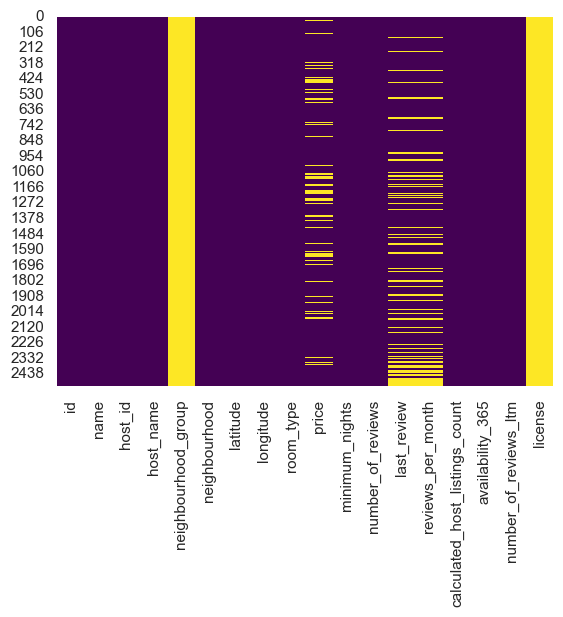

In [113]:
#Analisis nulos en df resumido
sns.heatmap(df_listings.isnull(), cbar=False, cmap='viridis')

In [114]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos_df = df_listings.isnull().mean() * 100

# Ordenar de mayor a menor porcentaje de nulos
porcentaje_nulos_ordenado = porcentaje_nulos_df.sort_values(ascending=False)
print(porcentaje_nulos_ordenado)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  20.745736
last_review                        20.745736
price                              15.628719
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
name                                0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
host_name                           0.000000
host_id                             0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
id                                  0.000000
dtype: float64


In [115]:
#como el 'neighbourhood_group' y el 'license', no poseen datos en sus columnas...
# procedo a eliminarlas y dejar aquellas que si entregan información. 
df_listings = df_listings.drop(columns=['neighbourhood_group','license'])
df_listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,42515,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,185647,Noelle,Commune de Genève,46.20198,6.15672,Private room,89.0,3,73,2023-11-03,0.49,1,363,6
1,107438,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,556499,F. M.,Commune de Genève,46.18905,6.16154,Private room,60.0,5,23,2019-11-30,0.15,1,362,0
2,203997,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.19964,6.15580,Entire home/apt,165.0,5,83,2023-11-03,0.61,2,90,8
3,276025,Rental unit in Versoix · ★4.62 · 1 bedroom · 4...,1442438,Gaby,Versoix,46.28031,6.16833,Entire home/apt,78.0,7,118,2023-09-16,0.82,1,311,12
4,338682,Rental unit in Geneva · ★4.81 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.20708,6.15545,Entire home/apt,157.0,5,116,2023-09-26,0.81,2,55,1


##### b. listings_details

<Axes: ylabel='id'>

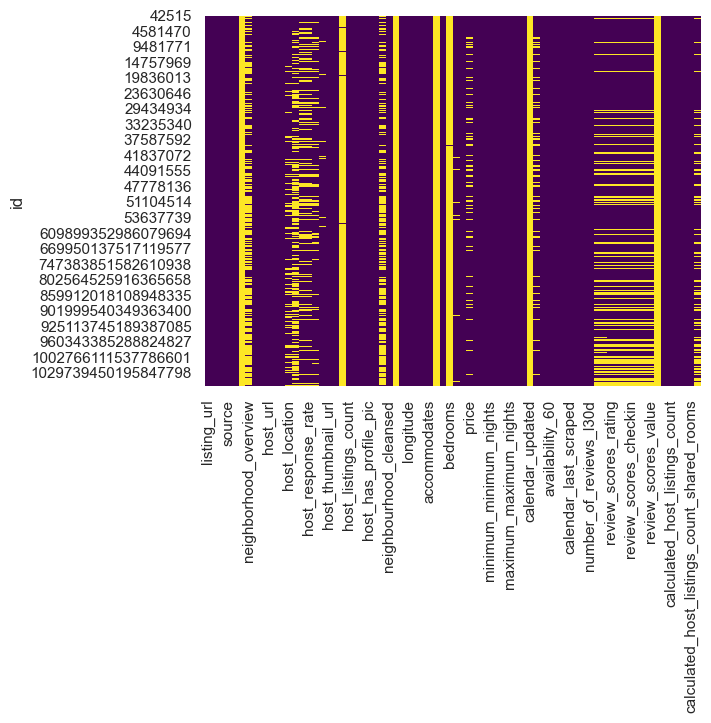

In [116]:
# Revisión de nulos del DF listing detallado: listings_details
sns.heatmap(listings_details.isnull(), cbar=False, cmap='viridis')
#con estos datos podemos definir que columnas vale la pena corregir o es mejor eliminar al hacer la depuracion de DF
#Columnas con gran porcentaje de nulos: 

In [117]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = listings_details.isnull().mean() * 100

# Ordenar de mayor a menor porcentaje de nulos
porcentaje_nulos_ordenado = porcentaje_nulos.sort_values(ascending=False)

# Filtrar las columnas que tienen más del 50% de nulos
columnas_mas_de_50_nulos = porcentaje_nulos[porcentaje_nulos > 50]

# Mostrar el resultado
print("Columnas con más del 50% de valores nulos:")
print(columnas_mas_de_50_nulos)



Columnas con más del 50% de valores nulos:
description                     100.000000
neighborhood_overview            52.836176
host_about                       51.804839
host_neighbourhood               99.047997
neighbourhood                    52.836176
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
bedrooms                         99.920666
calendar_updated                100.000000
license                         100.000000
dtype: float64


In [118]:

#luego de revisar las columnas de listing_details
# se hara un nuevo df solo con las columnas objetivo para este estudio.
target_listing = ['host_location', "host_is_superhost", "property_type", "accommodates", 
                  'beds', "first_review", "review_scores_value", "review_scores_cleanliness", 
                  "review_scores_location", "review_scores_accuracy", "review_scores_communication", 
                  "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url" ]
listings_gnv = pd.merge(df_listings, listings_details[target_listing], on='id', how='left')
listings_gnv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2521 entries, 0 to 2520
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2521 non-null   int64  
 1   name                            2521 non-null   object 
 2   host_id                         2521 non-null   int64  
 3   host_name                       2521 non-null   object 
 4   neighbourhood                   2521 non-null   object 
 5   latitude                        2521 non-null   float64
 6   longitude                       2521 non-null   float64
 7   room_type                       2521 non-null   object 
 8   price                           2127 non-null   float64
 9   minimum_nights                  2521 non-null   int64  
 10  number_of_reviews               2521 non-null   int64  
 11  last_review                     1998 non-null   object 
 12  reviews_per_month               19

In [119]:
listings_gnv.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url
0,42515,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,185647,Noelle,Commune de Genève,46.20198,6.15672,Private room,89.0,3,...,2011-09-24,4.52,4.77,4.84,4.72,4.83,4.84,4.73,1125,https://www.airbnb.com/rooms/42515
1,107438,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,556499,F. M.,Commune de Genève,46.18905,6.16154,Private room,60.0,5,...,2011-05-15,4.57,4.76,4.57,4.90,4.76,4.76,4.87,1125,https://www.airbnb.com/rooms/107438
2,203997,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.19964,6.15580,Entire home/apt,165.0,5,...,2012-11-11,4.83,4.90,4.95,4.98,4.99,4.98,4.90,730,https://www.airbnb.com/rooms/203997
3,276025,Rental unit in Versoix · ★4.62 · 1 bedroom · 4...,1442438,Gaby,Versoix,46.28031,6.16833,Entire home/apt,78.0,7,...,2012-03-15,4.70,4.73,4.76,4.69,4.89,4.88,4.62,360,https://www.airbnb.com/rooms/276025
4,338682,Rental unit in Geneva · ★4.81 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.20708,6.15545,Entire home/apt,157.0,5,...,2012-03-02,4.69,4.77,4.87,4.85,4.89,4.90,4.81,365,https://www.airbnb.com/rooms/338682


In [120]:
# En caso de que en algun momento me interesa analizar la availability, hare un df exclusivo de eso
availability_col = ['has_availability','availability_30', 'availability_60', 'availability_90','availability_365']

# Crear el subgrupo con las columnas seleccionadas
availability_df = listings_details[availability_col]

# Mostrar el DataFrame resultante para confirmar que contiene solo las columnas deseadas
print(availability_df.head())


       has_availability  availability_30  availability_60  availability_90  \
id                                                                           
42515                 t               28               58               88   
107438                t               27               57               87   
203997                t               30               60               90   
276025                t                0                6               36   
338682                t                0               25               55   

        availability_365  
id                        
42515                363  
107438               362  
203997                90  
276025               311  
338682                55  


##### c. df_neigh y df_rev

In [121]:
df_neigh.isnull().sum().sum()

45

<Axes: >

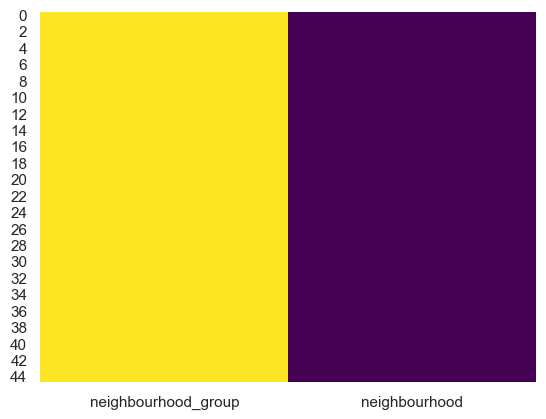

In [122]:
sns.heatmap(df_neigh.isnull(), cbar=False, cmap='viridis')

In [123]:
df_neigh = df_neigh.drop(columns=['neighbourhood_group'])
df_neigh.head()

,neighbourhood
0,Aire-la-Ville
1,Anières
2,Avully
3,Avusy
4,Bardonnex


In [124]:
df_rev.isnull().sum().sum()

0

##### d. price
Realizando un paso más adelante me percate que 'price' contiene valores que no se pueden convertir directamente a un tipo numérico debido a la presencia de caracteres no numéricos, por lo que debemos limpiar esa columna para utilizarla como variable numérica. 

In [125]:
# Asegurarse de que todos los valores en la columna 'price' sean cadenas
listings_gnv['price'] = listings_gnv['price'].astype(str)

# Eliminar caracteres no numéricos y convertir a tipo numérico
listings_gnv['price'] = listings_gnv['price'].str.replace('[\$,]', '', regex=True)
listings_gnv['price'] = pd.to_numeric(listings_gnv['price'], errors='coerce')

# Ver los datos limpios
print(listings_gnv[['price']].head())


   price
0   89.0
1   60.0
2  165.0
3   78.0
4  157.0


##### 
Ademas cuenta con valores nulos por lo que los completaremos con la mediana.


In [126]:
# Rellenar NaN en la columna 'price' con la mediana
listings_gnv_clean['price'].fillna(listings_gnv_clean['price'].median(), inplace=True)

## 3. Análisis exploratorio

#### a. Neighbourhoods /Commune

En el caso de Ginebra, sus "barrios"(neighbourhoods) se llaman Comunas (Commune en frances).
El Cantón es cada una de las divisiones administrativas del territorio de Suiza, que vendría siendo la ciudad que alberga todas estas comunas, que en el caso de este estudio es el Cantón de Ginebra, que esta compuesto por 45 commune. 

In [127]:
# Calcular el número de alojamientos por neighbourhood y ordenarlos de forma descendiente
alojamientos_por_commune = listings_gnv_clean['neighbourhood'].value_counts()
print(alojamientos_por_commune)
# Podemos ver que solo 20 Commune tienen más de 5 listings en su territorio, por lo que analizaremos solo esos top 20

Commune de Genève     1823
Vernier                 81
Grand-Saconnex          73
Carouge                 65
Lancy                   56
Thônex                  53
Chêne-Bougeries         47
Meyrin                  44
Versoix                 43
Chêne-Bourg             25
Cologny                 24
Veyrier                 22
Plan-les-Ouates         20
Bellevue                19
Collonge-Bellerive      15
Pregny-Chambésy         15
Onex                    14
Bernex                   9
Genthod                  8
Vandoeuvres              8
Hermance                 5
Anières                  5
Meinier                  5
Bardonnex                4
Corsier                  4
Troinex                  4
Collex-Bossy             3
Avully                   3
Satigny                  3
Presinge                 3
Puplinge                 3
Soral                    3
Chancy                   2
Céligny                  2
Dardagny                 2
Confignon                2
Russin                   1
L

In [128]:
# top 20 de neighbourhoods con más alojamientos
top_20_commune = alojamientos_por_commune.head(20).sort_values(ascending=False)
top_20_commune

Commune de Genève     1823
Vernier                 81
Grand-Saconnex          73
Carouge                 65
Lancy                   56
Thônex                  53
Chêne-Bougeries         47
Meyrin                  44
Versoix                 43
Chêne-Bourg             25
Cologny                 24
Veyrier                 22
Plan-les-Ouates         20
Bellevue                19
Collonge-Bellerive      15
Pregny-Chambésy         15
Onex                    14
Bernex                   9
Genthod                  8
Vandoeuvres              8
Name: neighbourhood, dtype: int64

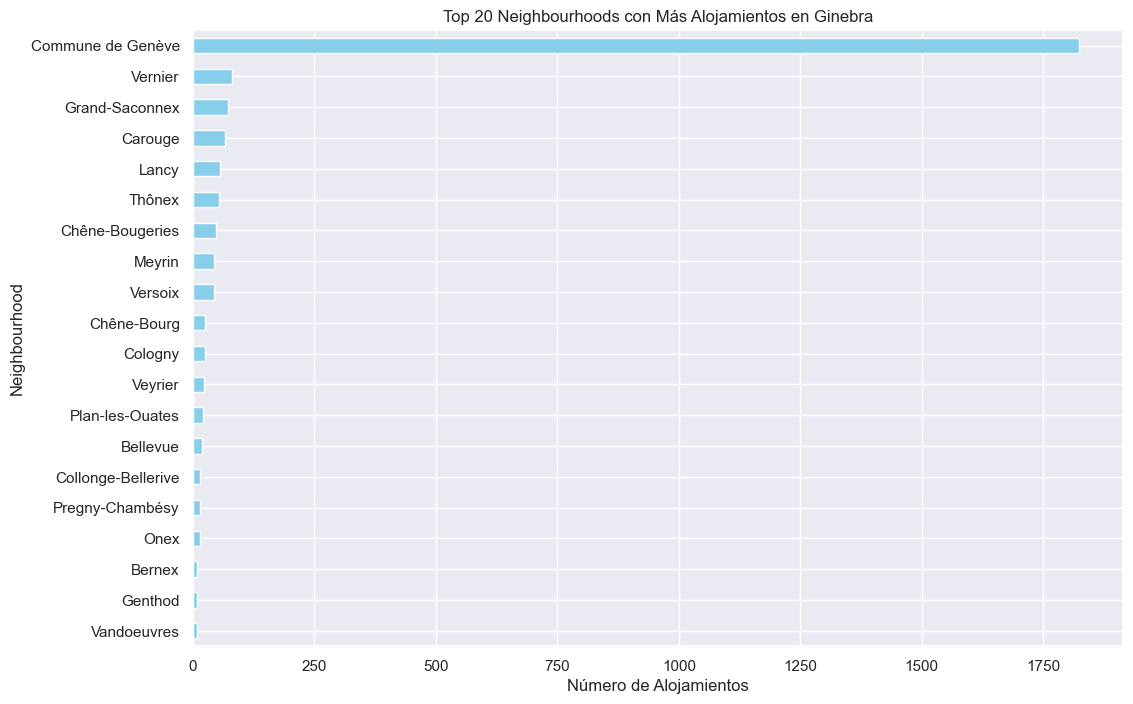

In [129]:
# Gráfico de barras con el barrio en el eje y
plt.figure(figsize=(12, 8))
top_20_commune.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 20 Neighbourhoods con Más Alojamientos en Ginebra')
plt.xlabel('Número de Alojamientos')
plt.ylabel('Neighbourhood')
plt.show()

In [158]:
#Porcentaje de alojamientos en el top 20 ciudades
total_alojamientos_top_20 = top_20_commune.sum()

# Calcular los porcentajes de alojamientos en cada comuna del top 20
porcentajes_top_20 = (top_20_commune / total_alojamientos_top_20) * 100

# Mostrar los porcentajes
print("Porcentajes de alojamientos en las comunas del top 20:")
print(porcentajes_top_20)


Porcentajes de alojamientos en las comunas del top 20:
Commune de Genève     73.985390
Vernier                3.287338
Grand-Saconnex         2.962662
Carouge                2.637987
Lancy                  2.272727
Thônex                 2.150974
Chêne-Bougeries        1.907468
Meyrin                 1.785714
Versoix                1.745130
Chêne-Bourg            1.014610
Cologny                0.974026
Veyrier                0.892857
Plan-les-Ouates        0.811688
Bellevue               0.771104
Collonge-Bellerive     0.608766
Pregny-Chambésy        0.608766
Onex                   0.568182
Bernex                 0.365260
Genthod                0.324675
Vandoeuvres            0.324675
Name: neighbourhood, dtype: float64


In [130]:
# Filtrar las comunas con más de 5 alojamientos
top_communes = alojamientos_por_commune[alojamientos_por_commune > 5].index
print(top_communes)

Index(['Commune de Genève', 'Vernier', 'Grand-Saconnex', 'Carouge', 'Lancy',
       'Thônex', 'Chêne-Bougeries', 'Meyrin', 'Versoix', 'Chêne-Bourg',
       'Cologny', 'Veyrier', 'Plan-les-Ouates', 'Bellevue',
       'Collonge-Bellerive', 'Pregny-Chambésy', 'Onex', 'Bernex', 'Genthod',
       'Vandoeuvres'],
      dtype='object')


In [131]:
# Filtrar el DataFrame original para mantener solo las Commune que cuentan con mas de 5 opciones de alojamiento:
filtered_listings = listings_gnv_clean[listings_gnv_clean['neighbourhood'].isin(top_communes)]
filtered_listings

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url
0,42515,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,185647,Noelle,Commune de Genève,46.201980,6.156720,Private room,89.0,3,...,2011-09-24,4.52,4.77,4.84,4.72,4.83,4.84,4.73,1125,https://www.airbnb.com/rooms/42515
1,107438,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,556499,F. M.,Commune de Genève,46.189050,6.161540,Private room,60.0,5,...,2011-05-15,4.57,4.76,4.57,4.90,4.76,4.76,4.87,1125,https://www.airbnb.com/rooms/107438
2,203997,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.199640,6.155800,Entire home/apt,165.0,5,...,2012-11-11,4.83,4.90,4.95,4.98,4.99,4.98,4.90,730,https://www.airbnb.com/rooms/203997
3,276025,Rental unit in Versoix · ★4.62 · 1 bedroom · 4...,1442438,Gaby,Versoix,46.280310,6.168330,Entire home/apt,78.0,7,...,2012-03-15,4.70,4.73,4.76,4.69,4.89,4.88,4.62,360,https://www.airbnb.com/rooms/276025
4,338682,Rental unit in Geneva · ★4.81 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.207080,6.155450,Entire home/apt,157.0,5,...,2012-03-02,4.69,4.77,4.87,4.85,4.89,4.90,4.81,365,https://www.airbnb.com/rooms/338682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1051657677386251190,Rental unit in Genève · ★New · 1 bedroom · 2 b...,485042270,Delab,Commune de Genève,46.202602,6.144528,Entire home/apt,107.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,https://www.airbnb.com/rooms/1051657677386251190
2517,1052578081004583058,Rental unit in Genève · ★New · 1 bedroom · 1 b...,552225573,Abraham,Commune de Genève,46.214127,6.133845,Entire home/apt,260.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,https://www.airbnb.com/rooms/1052578081004583058
2518,1053448032646962538,Rental unit in Genève · ★New · 1 bedroom · 1 b...,337397861,Sai Aashirvaad,Commune de Genève,46.216407,6.146102,Private room,80.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,https://www.airbnb.com/rooms/1053448032646962538
2519,1054315406400269946,Rental unit in Genève · ★New · 1 bedroom · 1 b...,551881137,Marion,Commune de Genève,46.209202,6.144925,Private room,80.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,https://www.airbnb.com/rooms/1054315406400269946


In [132]:
# Guardar el DataFrame 'filtered_listings' en un archivo CSV
csv_file_path = 'filtered_listings.csv'
filtered_listings.to_csv(csv_file_path, index=False)

# Verificar que el archivo se haya guardado correctamente
print(f"El DataFrame se ha guardado en {csv_file_path}")

El DataFrame se ha guardado en filtered_listings.csv


##### 
Luego de graficar los Airbnb por vecindario se puede apreciar que más del 70% de ellos se encuentra en la Commune de Geneve, es decir, el centro de la ciudad. 
Para tener una mejor visión de la distribución de Airbnb en Geneve, se graficara con FastMarkerCluster.

In [133]:
import folium
from folium.plugins import FastMarkerCluster

# Extraer las coordenadas de latitud y longitud
lats2023 = listings_gnv['latitude'].tolist()
lons2023 = listings_gnv['longitude'].tolist()
locations = list(zip(lats2023, lons2023))

# Crear el mapa centrado en Ginebra
map_gnv = folium.Map(location=[46.2044, 6.1432], zoom_start=12)  # Coordenadas de Ginebra

# Agregar los marcadores al mapa
FastMarkerCluster(data=locations).add_to(map_gnv)

# Mostrar el mapa
map_gnv


##### 3.a. I. Zonas del Cantón de Ginebra

Para este estuddio consideraremos clasificaran las propiedades que se encuentran en distintas zonas poblacionales.
Se tomaron datos de la población de Ginebra de la página web del gobierno Suizo: https://www.bfs.admin.ch/bfs/en/home/statistics/population.html , de su estudio "Permanent resident population in private households by institutional units and household size".

Para realizar el filtro entre población urbana y rural se considerará los siguiente parámetros:
- *Zonas Urbanas*: Se considera que tienen una densidad poblacional superior a 1000 habitantes por km².
- *Zonas Suburbanas*: Se considera que tienen una densidad poblacional inferior a 1000 habitantes por km² y superior a 500 habitantes por km².
- *Zonas Rurales*: Se considera que tienen una densidad poblacional inferior a 500 habitantes por km².

In [134]:
#se utilizara el siguiente codigo para dividir las comunas (neigbourhood), en urbanas, suburbanas y rurales 
# y crear una columna 'zona' para clasificarlas. 

# 1. cargar datos de densidad
density_gnv = pd.read_csv('population_gnv - Hoja 1.csv')

In [135]:
# 2.Revisar los datos para asegurarse de que están en el formato adecuado.

print(density_gnv)

         neighbourhood  Población Superficie  Densidad
0        Aire-la-Ville       1101       2,93    375,76
1              Anières       2201       3,86    570,20
2               Avully       1743       4,61    378,09
3                Avusy       1306       5,19    251,64
4            Bardonnex       2122          5    424,40
5             Bellevue       2974       4,35    638,67
6               Bernex       9420      12,95    727,41
7              Carouge      19099        2,7   7073,70
8             Cartigny        790       4,38    180,36
9              Céligny        637       4,65    136,99
10              Chancy       1081       5,36    201,68
11     Chêne-Bougeries      10113       4,13   2448,66
12         Chêne-Bourg       7777       1,28   6075,78
13             Choulex        979       3,91    250,38
14        Collex-Bossy       1576       6,89    228,73
15  Collonge-Bellerive       7414       6,12   1211,43
16             Cologny       4926       3,67   1342,23
17   Commu

In [136]:
density_gnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  45 non-null     object
 1   Población      45 non-null     int64 
 2   Superficie     45 non-null     object
 3   Densidad       45 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.5+ KB


In [137]:
# Remover saltos de línea
density_gnv['Densidad'] = density_gnv['Densidad'].str.replace('\n', '')

# Reemplazar comas que separan miles por nada
density_gnv['Densidad'] = density_gnv['Densidad'].str.replace('.', '')

# Reemplazar comas decimales por puntos
density_gnv['Densidad'] = density_gnv['Densidad'].str.replace(',', '.')

# Convertir a float
density_gnv['Densidad'] = density_gnv['Densidad'].astype(float)

# Verificar la conversión
print(density_gnv['Densidad'].head())
print(density_gnv['Densidad'].dtype)

0    375.76
1    570.20
2    378.09
3    251.64
4    424.40
Name: Densidad, dtype: float64
float64


In [138]:
print(density_gnv)

         neighbourhood  Población Superficie  Densidad
0        Aire-la-Ville       1101       2,93    375.76
1              Anières       2201       3,86    570.20
2               Avully       1743       4,61    378.09
3                Avusy       1306       5,19    251.64
4            Bardonnex       2122          5    424.40
5             Bellevue       2974       4,35    638.67
6               Bernex       9420      12,95    727.41
7              Carouge      19099        2,7   7073.70
8             Cartigny        790       4,38    180.36
9              Céligny        637       4,65    136.99
10              Chancy       1081       5,36    201.68
11     Chêne-Bougeries      10113       4,13   2448.66
12         Chêne-Bourg       7777       1,28   6075.78
13             Choulex        979       3,91    250.38
14        Collex-Bossy       1576       6,89    228.73
15  Collonge-Bellerive       7414       6,12   1211.43
16             Cologny       4926       3,67   1342.23
17   Commu

In [139]:
# 3. Clasificación de las Comunas: Aplicar los umbrales para clasificar las comunas.

# Definir umbrales
urban = 1000
rural = 500

# Crear una nueva columna para la clasificación en density_gnv
density_gnv['zona'] = density_gnv['Densidad'].apply(
    lambda x: 'urbana' if x > urban else ('rural' if x < rural else 'suburbana')
)

In [140]:
print(density_gnv[['neighbourhood', 'zona']].head())

   neighbourhood       zona
0  Aire-la-Ville      rural
1        Anières  suburbana
2         Avully      rural
3          Avusy      rural
4      Bardonnex      rural


In [141]:
#ahora debo agregar la columna zona a el df principal 'listings_gnv' 
pd.merge(listings_gnv,density_gnv[['neighbourhood', 'zona']], on='neighbourhood', how='left')


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,zona
0,42515,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,185647,Noelle,Commune de Genève,46.201980,6.156720,Private room,89.0,3,...,4.52,4.77,4.84,4.72,4.83,4.84,4.73,1125,https://www.airbnb.com/rooms/42515,urbana
1,107438,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,556499,F. M.,Commune de Genève,46.189050,6.161540,Private room,60.0,5,...,4.57,4.76,4.57,4.90,4.76,4.76,4.87,1125,https://www.airbnb.com/rooms/107438,urbana
2,203997,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.199640,6.155800,Entire home/apt,165.0,5,...,4.83,4.90,4.95,4.98,4.99,4.98,4.90,730,https://www.airbnb.com/rooms/203997,urbana
3,276025,Rental unit in Versoix · ★4.62 · 1 bedroom · 4...,1442438,Gaby,Versoix,46.280310,6.168330,Entire home/apt,78.0,7,...,4.70,4.73,4.76,4.69,4.89,4.88,4.62,360,https://www.airbnb.com/rooms/276025,urbana
4,338682,Rental unit in Geneva · ★4.81 · 1 bedroom · 1 ...,1001280,Mike,Commune de Genève,46.207080,6.155450,Entire home/apt,157.0,5,...,4.69,4.77,4.87,4.85,4.89,4.90,4.81,365,https://www.airbnb.com/rooms/338682,urbana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1051657677386251190,Rental unit in Genève · ★New · 1 bedroom · 2 b...,485042270,Delab,Commune de Genève,46.202602,6.144528,Entire home/apt,107.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,https://www.airbnb.com/rooms/1051657677386251190,urbana
2517,1052578081004583058,Rental unit in Genève · ★New · 1 bedroom · 1 b...,552225573,Abraham,Commune de Genève,46.214127,6.133845,Entire home/apt,260.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,https://www.airbnb.com/rooms/1052578081004583058,urbana
2518,1053448032646962538,Rental unit in Genève · ★New · 1 bedroom · 1 b...,337397861,Sai Aashirvaad,Commune de Genève,46.216407,6.146102,Private room,80.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,https://www.airbnb.com/rooms/1053448032646962538,urbana
2519,1054315406400269946,Rental unit in Genève · ★New · 1 bedroom · 1 b...,551881137,Marion,Commune de Genève,46.209202,6.144925,Private room,80.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,https://www.airbnb.com/rooms/1054315406400269946,urbana


In [142]:
listings_gnv=pd.merge(listings_gnv,density_gnv[['neighbourhood', 'zona']], on='neighbourhood', how='left')

In [143]:
# Revisar los datos finales
print(listings_gnv.head())

       id                                               name  host_id  \
0   42515  Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...   185647   
1  107438  Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...   556499   
2  203997  Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...  1001280   
3  276025  Rental unit in Versoix · ★4.62 · 1 bedroom · 4...  1442438   
4  338682  Rental unit in Geneva · ★4.81 · 1 bedroom · 1 ...  1001280   

  host_name      neighbourhood  latitude  longitude        room_type  price  \
0    Noelle  Commune de Genève  46.20198    6.15672     Private room   89.0   
1     F. M.  Commune de Genève  46.18905    6.16154     Private room   60.0   
2      Mike  Commune de Genève  46.19964    6.15580  Entire home/apt  165.0   
3      Gaby            Versoix  46.28031    6.16833  Entire home/apt   78.0   
4      Mike  Commune de Genève  46.20708    6.15545  Entire home/apt  157.0   

   minimum_nights  ...  review_scores_value review_scores_cleanliness  \
0            

Ahora el df principal 'listings_gnv' tiene 32 columnas. 

#### b. Tipos de Propiedades

In [144]:
listings_gnv.property_type.unique()


array(['Private room in rental unit', 'Entire rental unit',
       'Private room in loft', 'Entire loft', 'Entire condo',
       'Private room in home', 'Entire home', 'Private room in condo',
       'Entire villa', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Entire bungalow', 'Shared room in loft',
       'Entire serviced apartment', 'Shared room in rental unit',
       'Private room in townhouse', 'Private room in villa',
       'Private room in guesthouse', 'Room in hotel', 'Entire cottage',
       'Entire guest suite', 'Private room in nature lodge',
       'Shared room in home', 'Room in boutique hotel',
       'Entire townhouse', 'Tiny home', 'Shared room', 'Yurt',
       'Private room in casa particular', 'Private room in chalet',
       'Room in aparthotel', 'Private room in farm stay', 'Houseboat',
       'Private room in serviced apartment', 'Boat', 'Entire place',
       'Casa particular', 'Entire vacation home', 'Camper/RV',
       'Private room in shi

######
Nos dio de resultado 44 tipos diferentes de propiedades en Ginebra, pero se aprecia ciertos grupos, por lo que agrupare las propiedades en 4 grandes grupos:

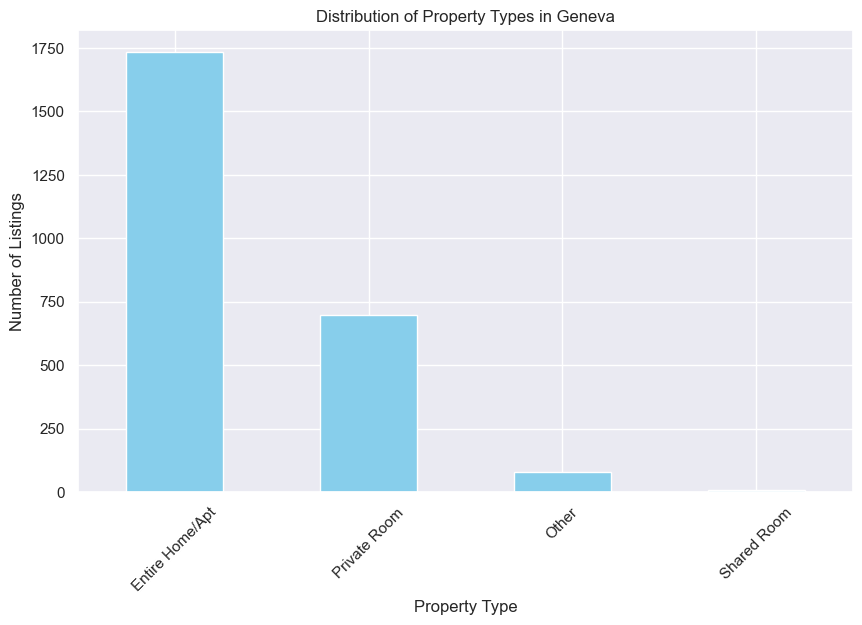

In [145]:
# Función para clasificar los tipos de propiedad
def classify_property_type(property_type):
    if 'entire' in property_type.lower() or 'whole' in property_type.lower():
        return 'Entire Home/Apt'
    elif 'private' in property_type.lower():
        return 'Private Room'
    elif 'shared' in property_type.lower() or 'shared room' in property_type.lower():
        return 'Shared Room'
    else:
        return 'Other'

# Crear la nueva columna con la clasificación de tipos de propiedad
listings_gnv['property_type'] = listings_gnv['property_type'].apply(classify_property_type)

# Graficar la distribución de los tipos de propiedad
property_counts = listings_gnv['property_type'].value_counts()

property_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Property Types in Geneva')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


Luego de realizar esta agrupacion por tipo de propiedad, se aprecia que en el Cantón de Ginebra la mayor oferta de Airbnb son propiedades completas que se pueden arrendar, ya sea una casa, departamento, loft, villa, etc. 

In [146]:
# Mostrar el número de propiedades por cada tipo
property_counts = listings_gnv['property_type'].value_counts()
print(property_counts)

Entire Home/Apt    1733
Private Room        697
Other                80
Shared Room          11
Name: property_type, dtype: int64


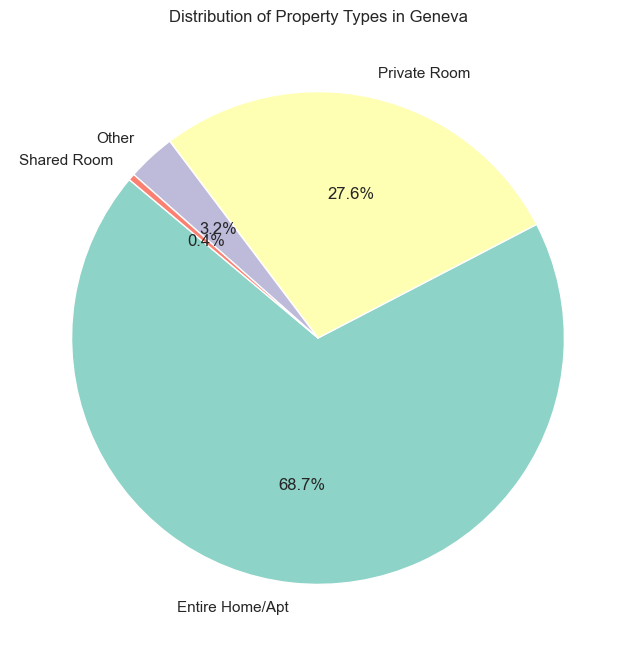

In [147]:
# Calcular los porcentajes de cada categoría para graficarlos
property_category_counts = listings_gnv['property_type'].value_counts(normalize=True) * 100

# Graficar los porcentajes por grupo
property_category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 8), startangle=140, colors=sns.color_palette("Set3"))
plt.title('Distribution of Property Types in Geneva')
plt.ylabel('')
plt.show()


#### c. Accommodates
Ahora analizaremos la máxima capacidad de huespedes por alojamiento y lo graficaremos. 

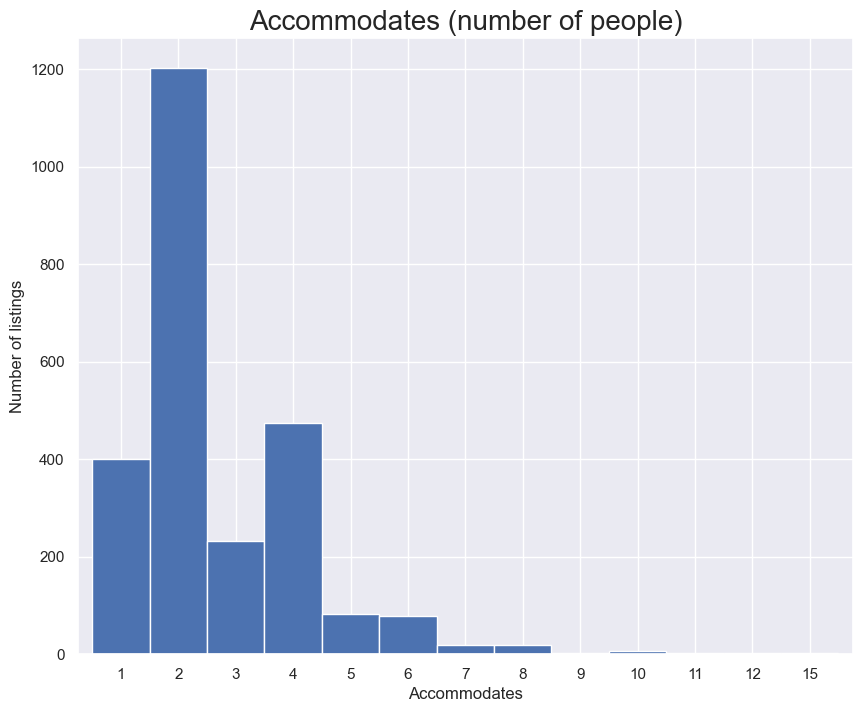

In [148]:
feq=listings_gnv['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [149]:
# Agrupar los datos por property_type y accommodates
accommodates_por_tipo = listings_gnv.groupby(['property_type', 'accommodates']).size().unstack(fill_value=0)
print(accommodates_por_tipo.head())



accommodates      1    2    3    4   5   6   7   8   9   10  11  12  15
property_type                                                          
Entire Home/Apt   77  810  202  439  80  75  18  17   2   7   2   2   2
Other             21   36    7   15   0   0   0   0   1   0   0   0   0
Private Room     296  353   23   19   2   3   0   1   0   0   0   0   0
Shared Room        6    4    0    1   0   0   0   0   0   0   0   0   0


#### d. Precios

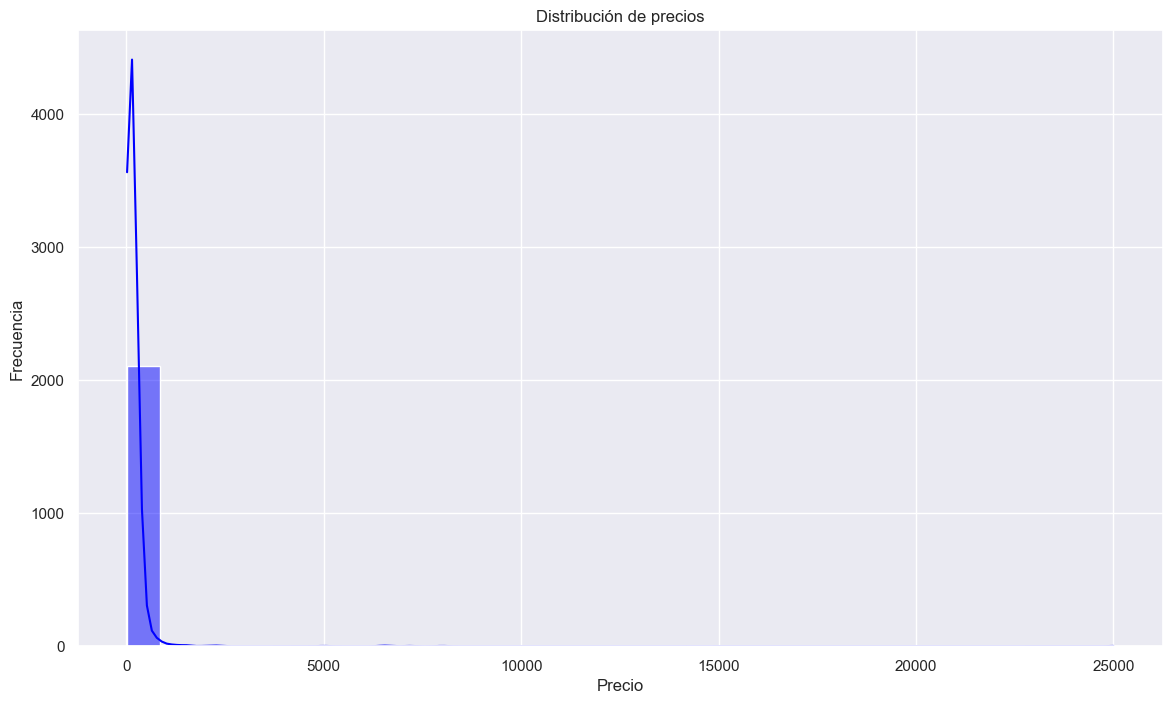

In [150]:
# Visualización de la distribución de precios
plt.figure(figsize=(14, 8))
sns.histplot(listings_gnv['price'], kde=True, bins=30, color='blue')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

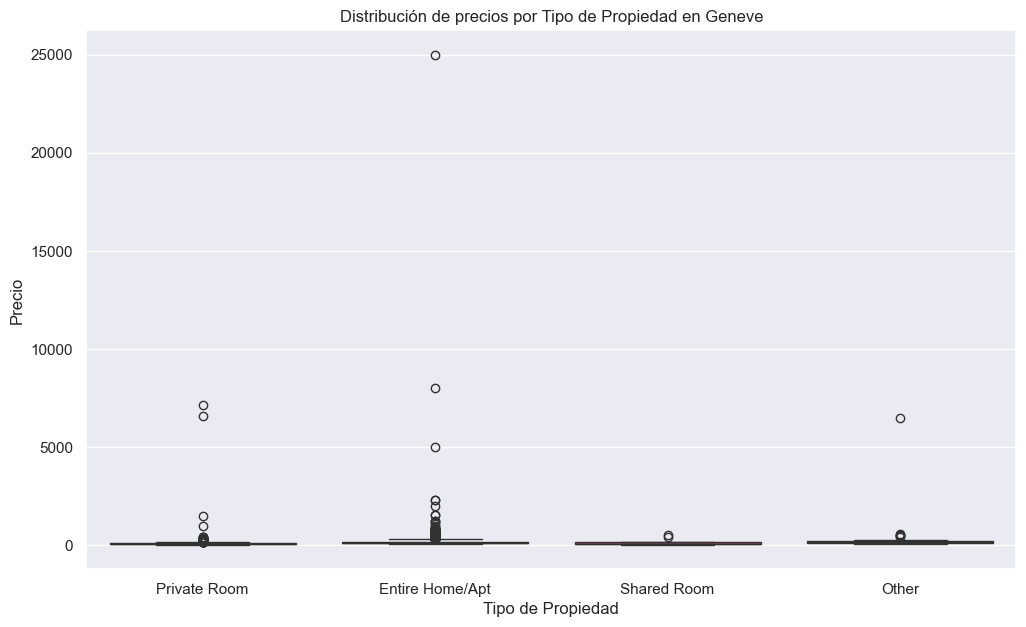

In [151]:
# Graficar la distribución de precios por categoría de propiedad con boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='property_type', y='price',hue='property_type',  data=listings_gnv, palette='flare')
plt.title('Distribución de precios por Tipo de Propiedad en Geneve')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.show()

#####
Ya que los datos no presentan una distribución normal, además que se encuentran varios Outliers, debemos tratar esto, para que los datos queden normalizados. 

## 4. Tratamiento de Outliers

Cuándo Tratar Outliers (Winsorización):
* Valores legítimos: Si los outliers representan casos extremos pero válidos.
* Grandes datasets: Para preservar la mayor cantidad de datos posibles.
* Modelos predictivos: En modelos donde los outliers pueden tener un impacto desproporcionado, como regresión lineal.


In [152]:
# Creamos un nuevo DataFrame para almacenar los valores tratados
listings_gnv_clean = listings_gnv.copy()

In [153]:
# Función para tratar outliers usando el rango intercuartílico (IQR)
def arreglar_outliers(df, column):
    
    # Calculamos los percentiles 25 y 75 (Q1 y Q3)
    Q1 = listings_gnv_clean[column].quantile(0.25)
    Q3 = listings_gnv_clean[column].quantile(0.75)

    # Calculamos el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calculamos los límites del intervalo
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Reemplazamos los valores atípicos por los límites del IQR
    listings_gnv_clean[column] = listings_gnv_clean[column].apply(
        lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x)
    )
    
    return listings_gnv_clean

# Aplicar la función a la columna 'price'
listings_gnv_clean = arreglar_outliers(listings_gnv_clean, 'price')


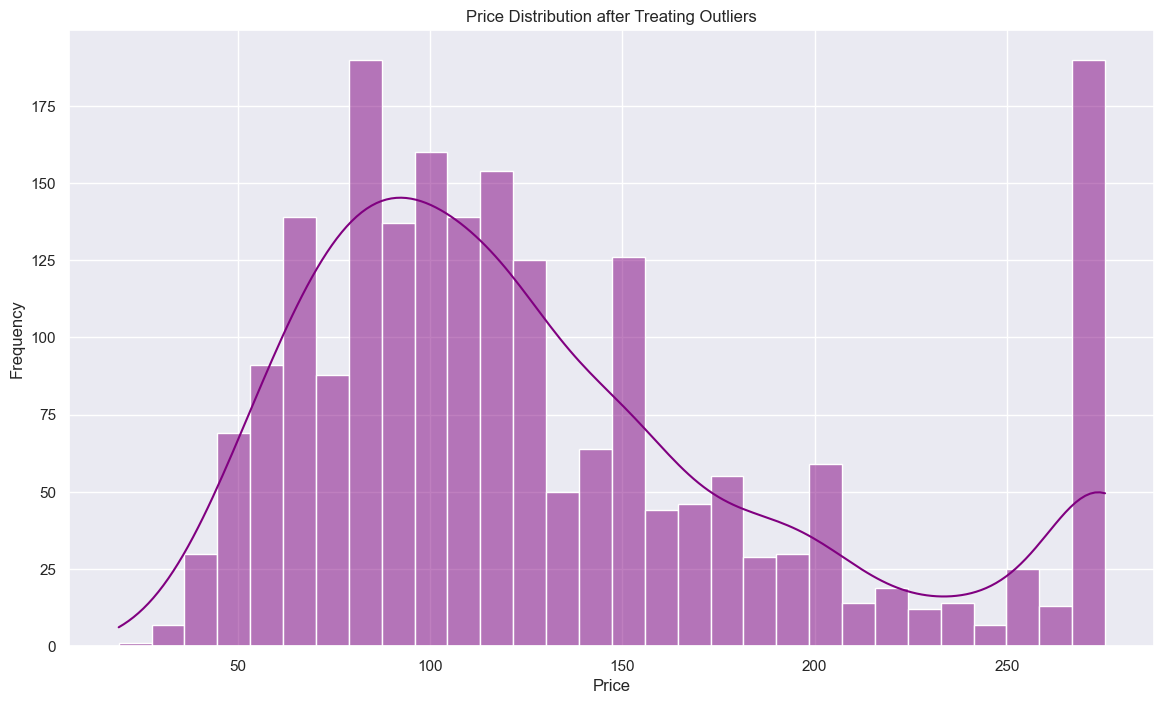

In [154]:
# Visualización de la distribución de precios después de tratamiento de outliers
plt.figure(figsize=(14, 8))
sns.histplot(listings_gnv_clean['price'], kde=True, bins=30, color='purple')
plt.title('Price Distribution after Treating Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Otras formulas para tratar Outliers

In [155]:
#Función utilizada para arreglar los outliers
def arreglar_outliers_simple(df):
    # Creamos un nuevo DataFrame para almacenar los valores tratados
    df_cleaned = df.copy()
 
    # Iteramos sobre cada columna del DataFrame
    for col in df_cleaned.columns:
        # Calculamos los percentiles 25 y 75 (Q1 y Q3) -- ¿recordáis lo que son en un boxplot?
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
 
        # Calculamos el rango intercuartílico (IQR)
        IQR = Q3 - Q1
 
        # Calculamos los límites del intervalo
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
 
        # Reemplazamos los valores atípicos por los límites del  (el upper si está por encima, el lower si está por debajo)
        df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
 
    return df_cleaned

In [156]:
#Otras opciones para tratar los Outliers
# Op. 1 para arreglar_outliers_simple
# Función para winsorizar (tratar outliers)
def winsorize_series(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Aplicar winsorización a la columna de precios
listings_details['price_winsorized'] = winsorize_series(listings_details['price'])

# Visualización de la distribución de precios después de winsorización
plt.figure(figsize=(14, 8))
sns.histplot(listings_details['price_winsorized'], kde=True, bins=30, color='purple')
plt.title('Price Distribution after Winsorization')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualización de la distribución de precios por categoría de propiedad después de winsorización
plt.figure(figsize=(14, 8))
sns.boxplot(data=listings_details, x='property_category', y='price_winsorized', palette="Set3")
plt.title('Price Distribution by Property Type in Geneva after Winsorization')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Op. 2
# Otra manera, no la utilizare, pero la guardo por si acaso para otro ejercicio:
 
def fix_outliers_with_tukey_extremes(df, columns):
    df_copy = df.copy()  # Hace una copia del DataFrame original
    for column_name in columns:
        if df_copy[column_name].dtype in ['int64', 'float64']:  # Asegurarse de que la columna sea numérica
            q1 = df_copy[column_name].quantile(0.25)
            q3 = df_copy[column_name].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
           
            # Reemplaza los valores atípicos en el extremo inferior con el límite inferior
            df_copy.loc[df_copy[column_name] < lower_bound, column_name] = lower_bound
           
            # Reemplaza los valores atípicos en el extremo superior con el límite superior
            df_copy.loc[df_copy[column_name] > upper_bound, column_name] = upper_bound
    return df_copy

In [ ]:
# Op. 3
# REPAIR OUTLIERS USING INTERQUARTILE RANGES
 
def reparar_atipicos(df, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
   
    atipico_inf = Q1 - (1.5 * IQR)
    atipico_sup = Q3 + (1.5 * IQR)
   
    for indice in range(len(df[col.name])):
        if indice in df.index:  
            elemento = df.loc[indice, col.name]
            if elemento > atipico_sup:
                df.loc[indice, col.name] = atipico_sup
            elif elemento < atipico_inf:
                df.loc[indice, col.name] = atipico_inf
           
    return df  
 
#fix the outliers of the variable Price
reparar_atipicos(df, df['price'])

In [ ]:
# Op. 4
# toma los cuartiles y los empuja hacia las vallas
# toma los outliers y los iguala a los extremos
def funcion (data2):
 
    data2 = data2.dropna()
 
    for columna in data2.columns:
        if data2[columna].dtype != 'object':  
        
            q3 = data2[columna].quantile(0.75)
            q1 = data2[columna].quantile(0.25)
        
            iqr = q3 - q1
    
            
            inferiores = q1 - 1.5 * iqr
            superiores = q3 + 1.5 * iqr
            data2[columna] = data2[columna].apply(lambda x: inferiores if x < inferiores else (superiores if x > superiores else x))
    
    return data2
 
 
data2_procesado = funcion(data2)
data2_procesado.head()

## 3. Continuación de analisis exploratorio

Luego de hacer la limpieza de outliers, ahora podemos volver a graficar la distribucion de los precios por tipo de propiedad, además de calcular el precio promedio por grupo. 

#### d. Precios

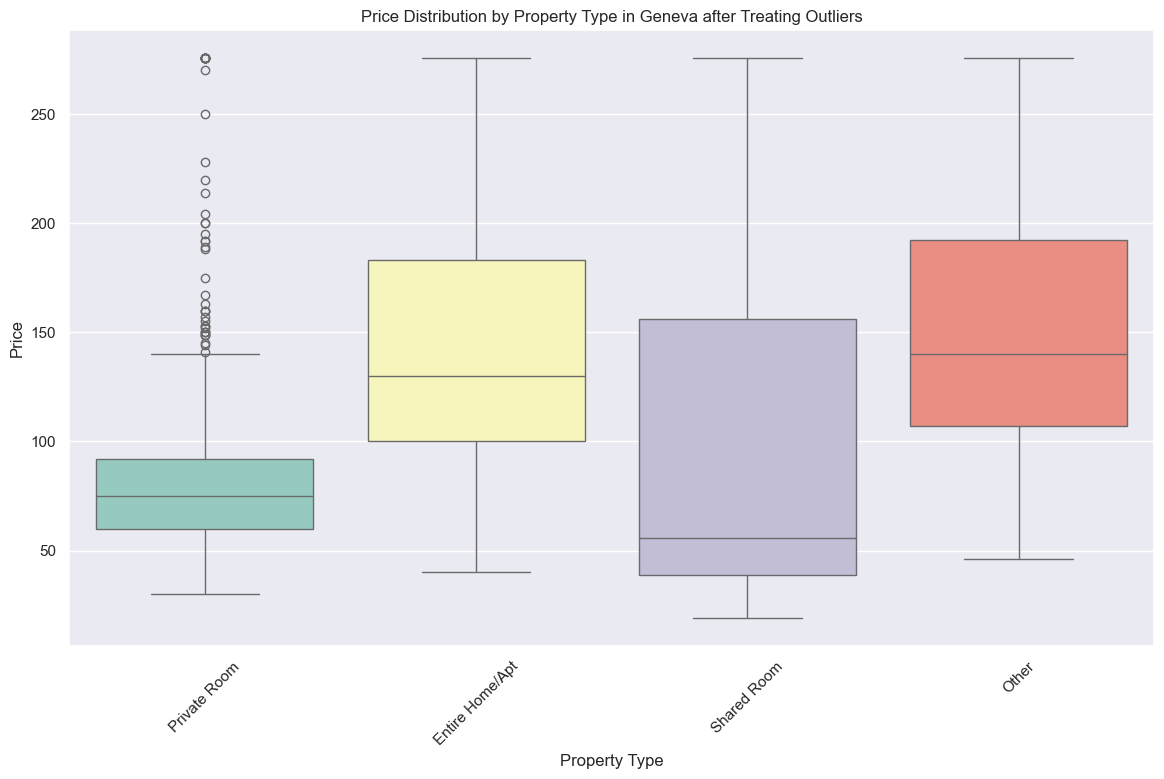

In [ ]:
# Visualización de la distribución de precios por categoría de propiedad después de tratamiento de outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=listings_gnv_clean, x='property_type', y='price', palette="Set3")
plt.title('Price Distribution by Property Type in Geneva after Treating Outliers')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


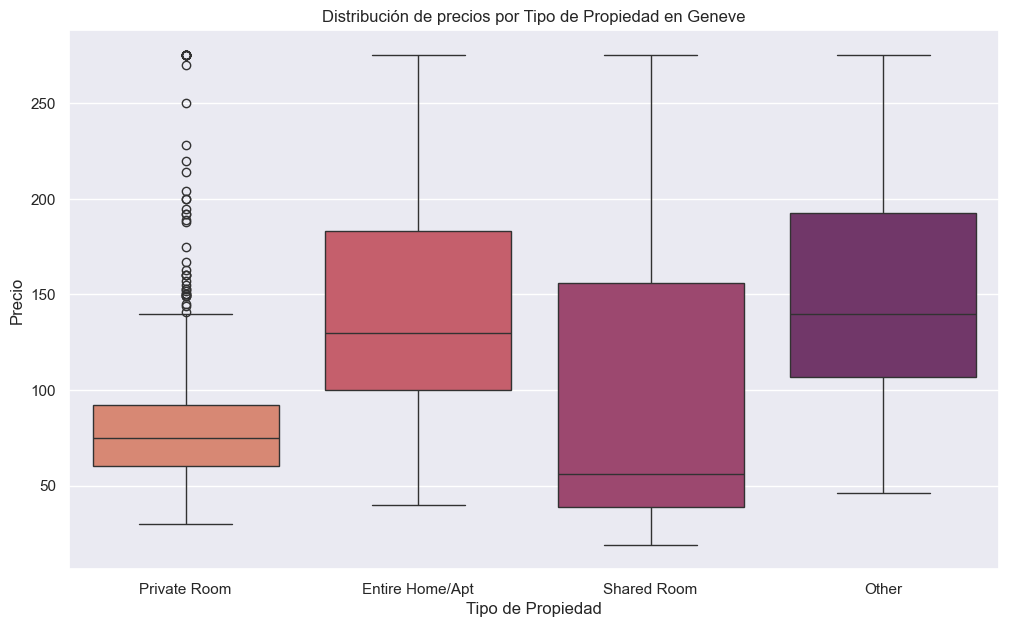

In [ ]:
# Graficar la distribución de precios por categoría de propiedad con boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='property_type', y='price',hue='property_type',  data=listings_gnv_clean, palette='flare')
plt.title('Distribución de precios por Tipo de Propiedad en Geneve')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.show()

In [ ]:
stats_describe = listings_gnv_clean.groupby('property_type')['price'].describe()
print("Estadísticas generales por tipo de propiedad:")
print(stats_describe)



Estadísticas generales por tipo de propiedad:
                  count        mean         std   min    25%    50%    75%  \
property_type                                                                
Entire Home/Apt  1454.0  149.185351   62.681680  40.0  100.0  130.0  183.0   
Other              71.0  153.239437   61.182330  46.0  107.0  140.0  192.5   
Private Room      593.0   84.258853   43.017232  30.0   60.0   75.0   92.0   
Shared Room         9.0  109.000000  102.074421  19.0   39.0   56.0  156.0   

                   max  
property_type           
Entire Home/Apt  275.5  
Other            275.5  
Private Room     275.5  
Shared Room      275.5  


#####
Lo que nos interesa a nosotros es saber entre que precios estan los alojamientos por cada tipo de propiedad, por lo que tomaremos en cuenta como minimo, promedio y maximo a los cuartiles, para tener una idea general de cada categoria:

In [ ]:
# Calcular los cuartiles específicos por tipo de propiedad
quartiles = listings_gnv_clean.groupby('property_type')['price'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ['Q1', 'Median', 'Q3']

print("\nCuartiles específicos por tipo de propiedad:")
print(quartiles)


Cuartiles específicos por tipo de propiedad:
                    Q1  Median     Q3
property_type                        
Entire Home/Apt  100.0   130.0  183.0
Other            107.0   140.0  192.5
Private Room      60.0    75.0   92.0
Shared Room       39.0    56.0  156.0


##### Relación entre Precio, Zona y tipo de alojamiento

Se analizará la relacion entre estas variables y luego se graficará los rangos de precio que posee cada zona y tipo de alojamiento. 

In [ ]:
# Contar el número de alojamientos en cada zona
alojamientos_por_zona = listings_gnv_clean['zona'].value_counts()
print(alojamientos_por_zona)

urbana       2422
suburbana      65
rural          34
Name: zona, dtype: int64


In [ ]:
# Contar el número de alojamientos por tipo de propiedad en cada zona
alojamientos_por_tipo_y_zona = listings_gnv_clean.groupby(['zona', 'property_type']).size().unstack(fill_value=0)
print(alojamientos_por_tipo_y_zona)

property_type  Entire Home/Apt  Other  Private Room  Shared Room
zona                                                            
rural                       21      1            12            0
suburbana                   46      3            15            1
urbana                    1666     76           670           10


In [ ]:
# Usar describe para obtener estadísticas generales
precioxzona = listings_gnv_clean.groupby('zona')['price'].describe()
print("Estadísticas generales por zona:")
print(precioxzona)

Estadísticas generales por zona:
            count        mean        std   min   25%    50%    75%    max
zona                                                                     
rural        29.0  108.224138  64.498005  46.0  60.0   90.0  130.0  275.5
suburbana    59.0  152.161017  80.244102  40.0  80.0  145.0  215.5  275.5
urbana     2039.0  130.763119  64.330313  19.0  83.0  115.0  160.0  275.5


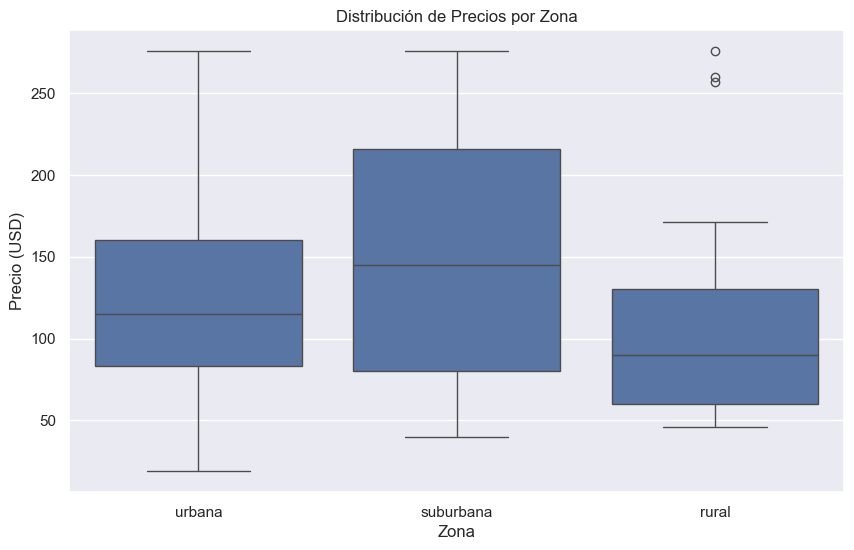

In [ ]:
# Gráfico de boxplot para precios por zonas
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_gnv_clean, x='zona', y='price', order=['urbana', 'suburbana', 'rural'])
plt.title('Distribución de Precios por Zona')
plt.xlabel('Zona')
plt.ylabel('Precio (USD)')
plt.show()

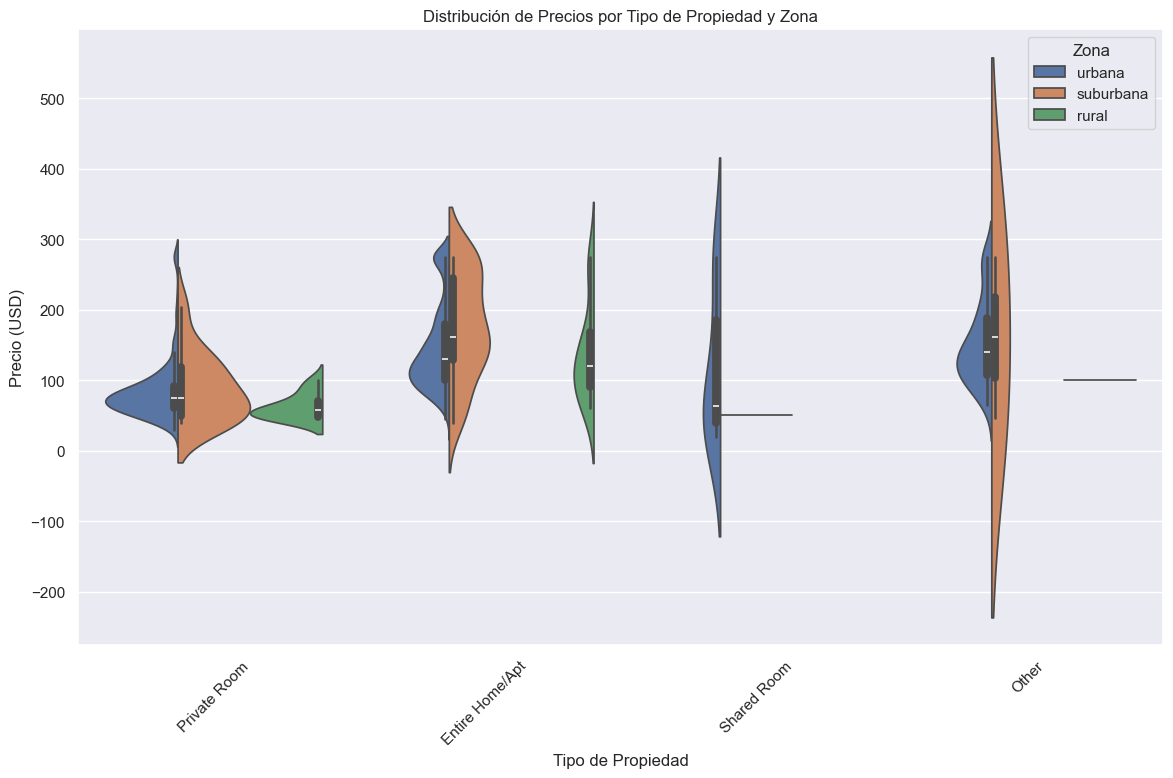

In [ ]:
# Gráfico de violín para precios por tipo de propiedad y zona
plt.figure(figsize=(14, 8))
sns.violinplot(data=listings_gnv_clean, x='property_type', y='price', hue='zona', split=True)
plt.title('Distribución de Precios por Tipo de Propiedad y Zona')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.legend(title='Zona')
plt.show()

#####  Precio medio por Commune
Tomando en cuanta que más del 70% de los Airbnb se localizan en la comuna de Geneve y que el top 20 de Commune tienen más de 5 alojamientos , analizaremos los precios medios para 2 personas en esas 20 comunas, que poseen más de 5 opciones para elegir en cuanto a alojamiento. 

In [ ]:
# Filtrar los alojamientos que permiten 2 personas
feq = listings_gnv_clean[listings_gnv_clean['accommodates'] == 2]

# Calcular el precio promedio por neighbourhood
precio_promedio_por_neighbourhood = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Verificar el resultado
print(precio_promedio_por_neighbourhood)

neighbourhood
Genthod               205.500000
Hermance              185.000000
Bellevue              173.500000
Vandoeuvres           166.000000
Confignon             150.000000
Cologny               142.875000
Pregny-Chambésy       124.222222
Commune de Genève     118.215762
Grand-Saconnex        114.689655
Versoix               110.181818
Corsier               105.000000
Chêne-Bougeries       104.750000
Carouge               104.461538
Satigny               100.000000
Dardagny              100.000000
Collonge-Bellerive     98.000000
Lancy                  97.750000
Anières                96.666667
Plan-les-Ouates        96.000000
Collex-Bossy           96.000000
Soral                  95.000000
Meyrin                 91.000000
Onex                   89.200000
Chêne-Bourg            87.600000
Laconnex               87.000000
Thônex                 84.166667
Vernier                82.393939
Meinier                77.500000
Bernex                 62.500000
Veyrier                62.000

In [ ]:
# Filtrar el precio promedio por los top 20 neighbourhoods
precio_promedio_top_20 = precio_promedio_por_neighbourhood[top_20_commune.index]
precio_promedio_top_20

Commune de Genève     118.215762
Vernier                82.393939
Grand-Saconnex        114.689655
Carouge               104.461538
Lancy                  97.750000
Thônex                 84.166667
Chêne-Bougeries       104.750000
Meyrin                 91.000000
Versoix               110.181818
Chêne-Bourg            87.600000
Cologny               142.875000
Veyrier                62.000000
Plan-les-Ouates        96.000000
Bellevue              173.500000
Collonge-Bellerive     98.000000
Pregny-Chambésy       124.222222
Onex                   89.200000
Bernex                 62.500000
Genthod               205.500000
Vandoeuvres           166.000000
Name: price, dtype: float64

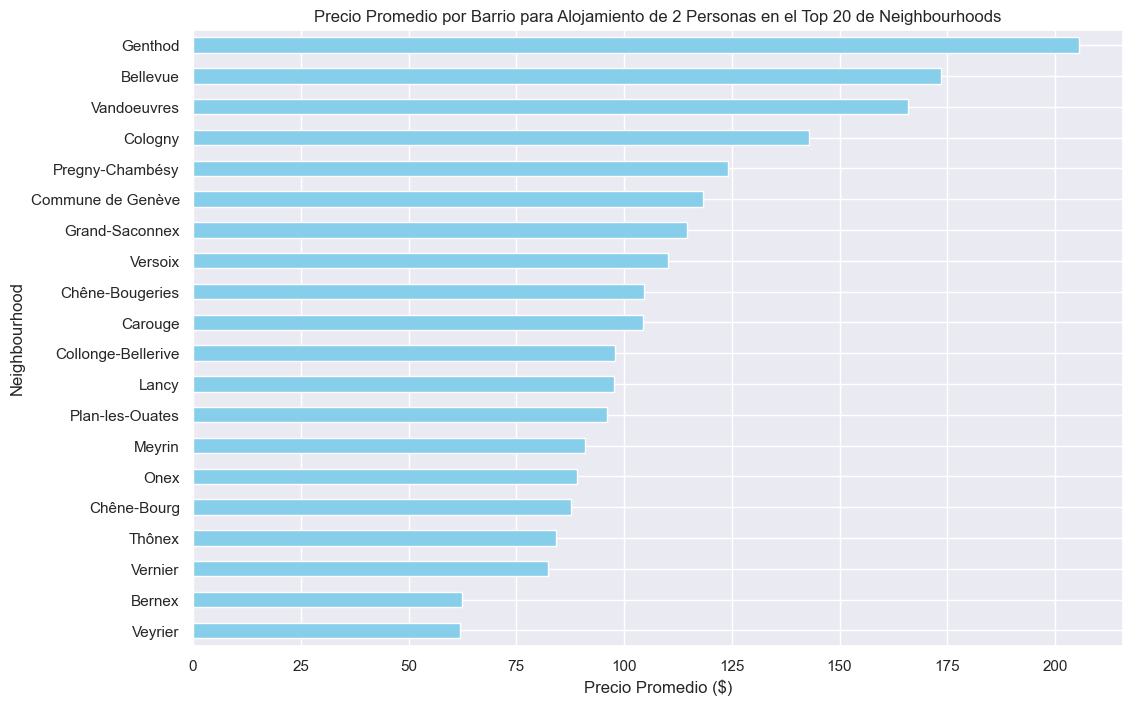

In [ ]:
# Gráfico de barras con el barrio en el eje y
plt.figure(figsize=(12, 8))
precio_promedio_top_20.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Precio Promedio por Barrio para Alojamiento de 2 Personas en el Top 20 de Neighbourhoods')
plt.xlabel('Precio Promedio ($)')
plt.ylabel('Neighbourhood')
plt.show()


##### 
Graficar un df con el top_20_commune, zona, precio_promedio_top_20, la cantidad de alojamientos que hay en ese barrio.  
Para esto primero limpare el df clean, para que solo tenga el top_20_commune

In [ ]:
# Crear un DataFrame con la cantidad de alojamientos, zona y precio promedio
top_20_info = pd.DataFrame({
    'Alojamientos': top_20_commune,
    'Zona': filtered_listings.groupby('neighbourhood')['zona'].first(),  # Asumiendo que cada neighbourhood tiene una sola zona
    'Precio Promedio': precio_promedio_top_20[top_20_commune.index]
}).sort_values(by='Alojamientos', ascending=False)
top_20_info

,Alojamientos,Zona,Precio Promedio
Commune de Genève,1823,urbana,118.215762
Vernier,81,urbana,82.393939
Grand-Saconnex,73,urbana,114.689655
Carouge,65,urbana,104.461538
Lancy,56,urbana,97.750000
Thônex,53,urbana,84.166667
Chêne-Bougeries,47,urbana,104.750000
Meyrin,44,urbana,91.000000
Versoix,43,urbana,110.181818
Chêne-Bourg,25,urbana,87.600000


#####
Ahora se visualiza que de son 20 Commune que cuentan con más de 5 opciones de alojamiento, y 1t6 de ellas son comunas urbanas y las otras 4 son suburbanas. 
Tambien tenemos el precio promedio para 2 personas por noche, va desde los 62 a los 205.5 euros. 

##### Precio medio por zona y categoria de alojamiento
Ahora calculamos el precio promedio de una noche de alojamiento para 2 personas, que es el tipo de alojamiento mas comun, con respecto a la zona y categoria de alojamiento.

In [ ]:
# Calcular el precio promedio por zona y tipo de propiedad
precio_promedio_por_zona_tipo = feq.groupby(['zona', 'property_type'])['price'].mean().unstack().fillna(0).sort_index()
precio_promedio_por_zona_tipo

property_type,Entire Home/Apt,Other,Private Room,Shared Room
zona,,,,
rural,85.857143,0.000000,68.00000,0.00
suburbana,130.500000,46.000000,122.00000,50.00
urbana,124.215478,164.586207,87.09622,147.25


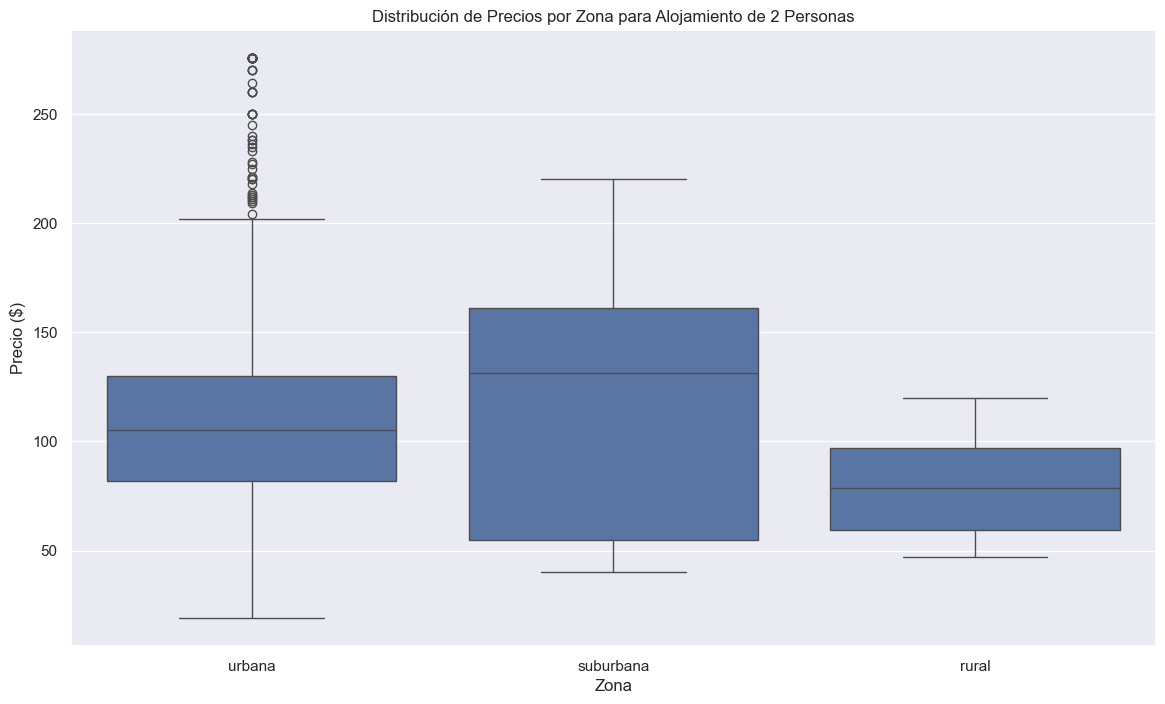

In [ ]:
# Gráfico de cajas para mostrar la distribución de precios por zona
plt.figure(figsize=(14, 8))
sns.boxplot(x='zona', y='price', data=feq)
plt.title('Distribución de Precios por Zona para Alojamiento de 2 Personas')
plt.xlabel('Zona')
plt.ylabel('Precio ($)')
plt.show()

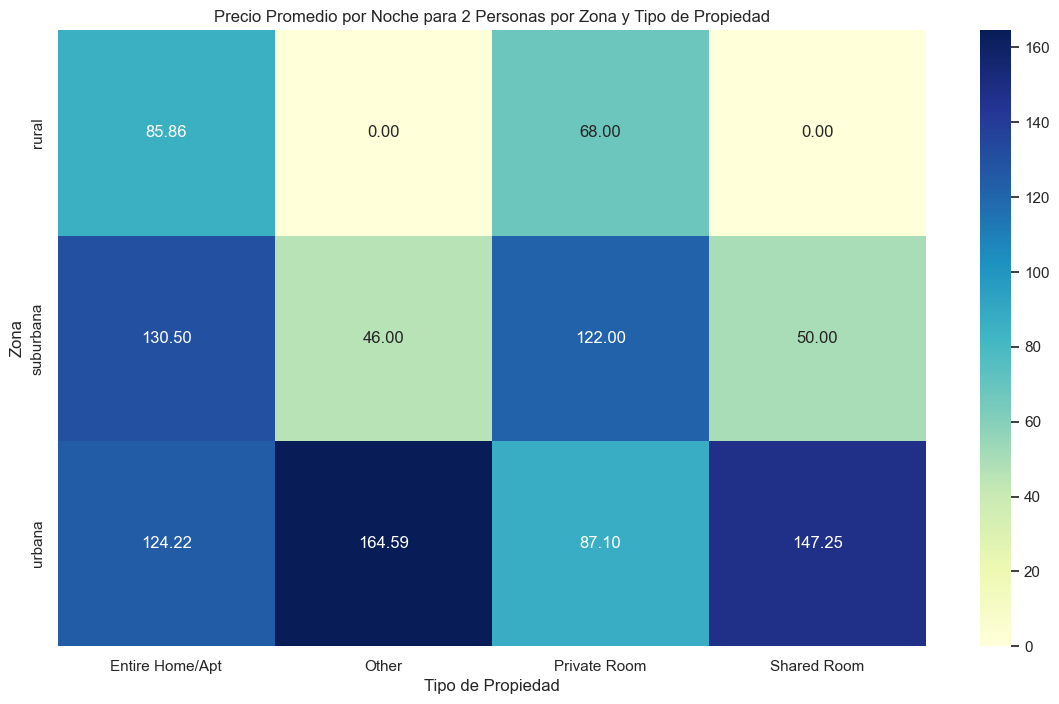

In [ ]:
# Crear el heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(precio_promedio_por_zona_tipo, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Precio Promedio por Noche para 2 Personas por Zona y Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Zona')
plt.show()

#### e. Reviews

Analizaremos las clasificaciones de los alojamientos, que poseen 7 categorías:

* 1. Experiencia general(review_scores_rating). ¿Cuál fue su experiencia en general?
* 2. Limpieza(review_scores_cleanliness). ¿El espacio era limpio y ordenado?
* 3. Precisión(review_scores_accuracy). ¿Qué tan cercano a la realidad era la descripcion del lugar?
* 4. Valor(review_scores_value). ¿Sintió que el alojamiento valia el precio que pago?
* 5. Comunicación(review_scores_communication). ¿Qué tal fue la comunicación del anfitrión antes y durante su estadía?
* 6. Llegada(review_scores_checkin). ¿Cómo fue el check-in al llegar al alojamiento?
* 7. Ubicación (review_scores_location). ¿Qué tal era el barrio en donde se ubicaba el alojamiento?

####
Primero analizaré la puntuación de la localización para aquellos alojamientos que se encuentran en una Commune que posee más de 5 alternativas de Airbnb.

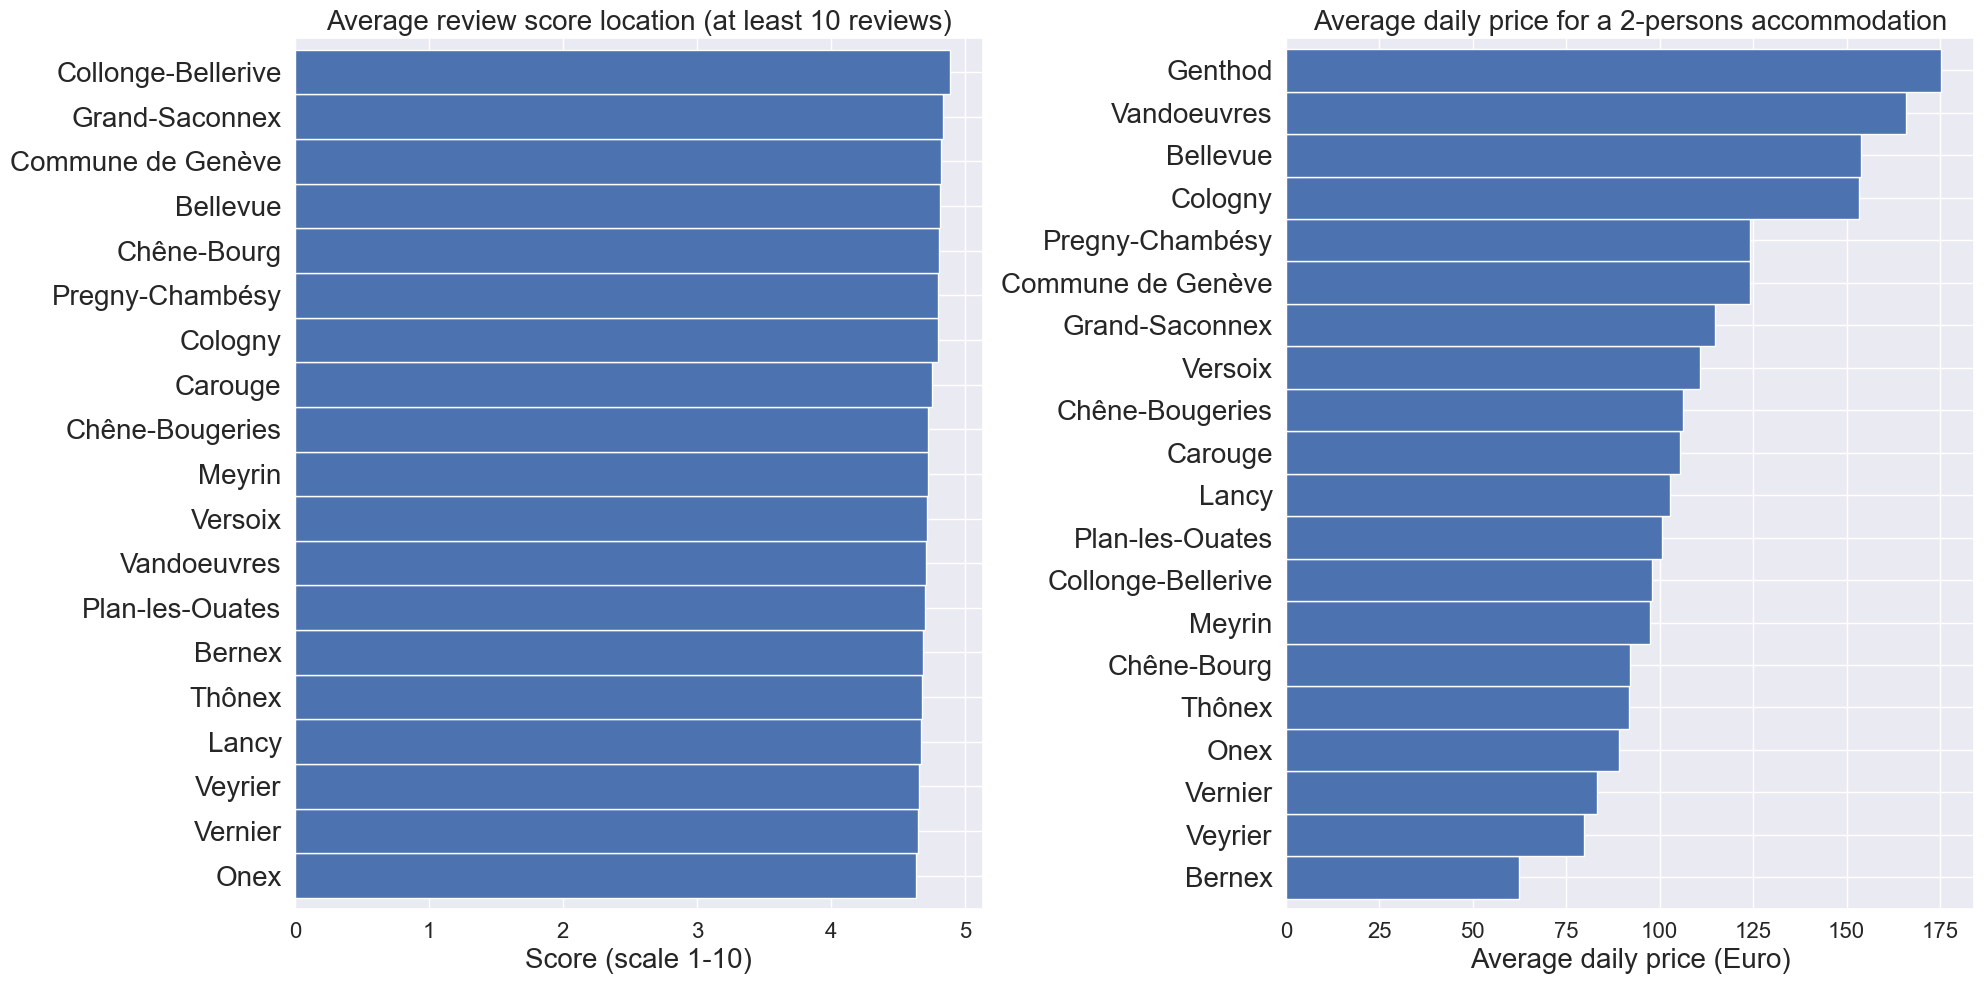

In [157]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = filtered_listings[filtered_listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = filtered_listings[filtered_listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

#### f. Super Host

In [ ]:
# Contar los valores de la columna 'host_is_superhost'
superhost_counts = filtered_listings['host_is_superhost'].value_counts()
superhost_counts

f    1948
t     491
Name: host_is_superhost, dtype: int64

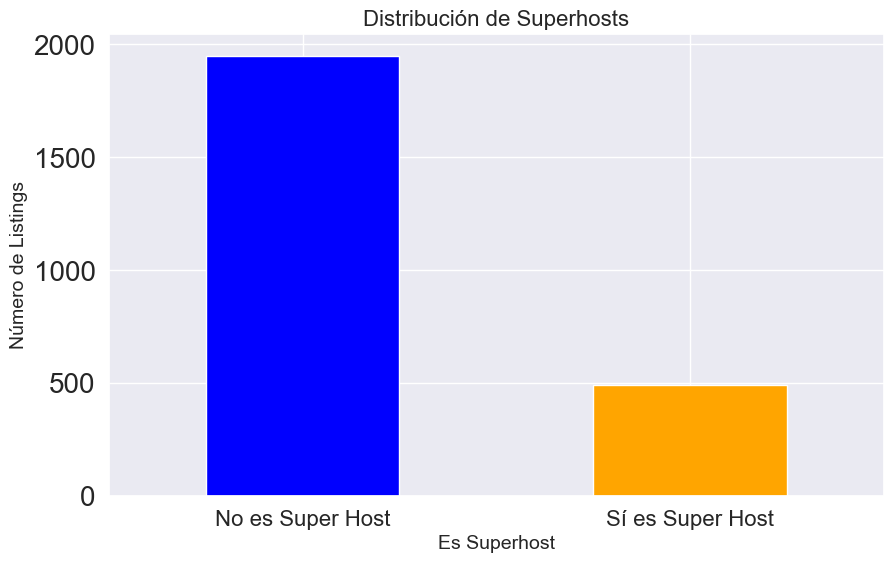

In [ ]:
# Graficar la distribución de superhosts y no-superhosts
plt.figure(figsize=(10, 6))
superhost_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Superhosts', fontsize=16)
plt.xlabel('Es Superhost', fontsize=14)
plt.ylabel('Número de Listings', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No es Super Host', 'Sí es Super Host'], rotation=0)
plt.show()


In [ ]:
# Paso 1: Filtrar los datos para incluir solo superhosts
superhosts = filtered_listings[filtered_listings['host_is_superhost'] == 't']

# Paso 2: Contar la cantidad de superhosts en cada vecindario
superhosts_by_neighbourhood = superhosts['neighbourhood'].value_counts()
superhosts_by_neighbourhood

Commune de Genève    375
Grand-Saconnex        19
Carouge               14
Vernier               14
Lancy                 12
Meyrin                10
Chêne-Bougeries       10
Veyrier                6
Cologny                5
Bellevue               4
Chêne-Bourg            4
Pregny-Chambésy        4
Plan-les-Ouates        4
Thônex                 4
Versoix                2
Onex                   2
Bernex                 1
Vandoeuvres            1
Name: neighbourhood, dtype: int64

In [ ]:
# Paso 1: Contar el número total de cada tipo de propiedad
total_by_property_type = filtered_listings['property_type'].value_counts()
superhosts_by_property_type = superhosts['property_type'].value_counts()
superhosts_by_property_type

Entire Home/Apt    310
Private Room       168
Other               10
Shared Room          3
Name: property_type, dtype: int64

In [ ]:
# Paso 3: Calcular el porcentaje de superhosts en cada tipo de propiedad
percentage_superhosts = (superhosts_by_property_type / total_by_property_type) * 100
percentage_superhosts

Entire Home/Apt    18.289086
Private Room       24.633431
Other              12.987013
Shared Room        30.000000
Name: property_type, dtype: float64

In [ ]:
# Contar el número de superhosts en cada zona
superhosts_by_zone = superhosts['zona'].value_counts()
print(superhosts_by_zone)



urbana       485
suburbana      6
Name: zona, dtype: int64


#### f. Reviews

Analizaremos las clasificaciones de los alojamientos, que poseen 7 categorías:

* 1. Experiencia general(review_scores_rating). ¿Cuál fue su experiencia en general?
* 2. Limpieza(review_scores_cleanliness). ¿El espacio era limpio y ordenado?
* 3. Precisión(review_scores_accuracy). ¿Qué tan cercano a la realidad era la descripcion del lugar?
* 4. Valor(review_scores_value). ¿Sintió que el alojamiento valia el precio que pago?
* 5. Comunicación(review_scores_communication). ¿Qué tal fue la comunicación del anfitrión antes y durante su estadía?
* 6. Llegada(review_scores_checkin). ¿Cómo fue el check-in al llegar al alojamiento?
* 7. Ubicación (review_scores_location). ¿Qué tal era el barrio en donde se ubicaba el alojamiento?



####
Primero analizaré la puntuación de la localización para aquellos alojamientos que se encuentran en una Commune que posee más de 5 alternativas de Airbnb.

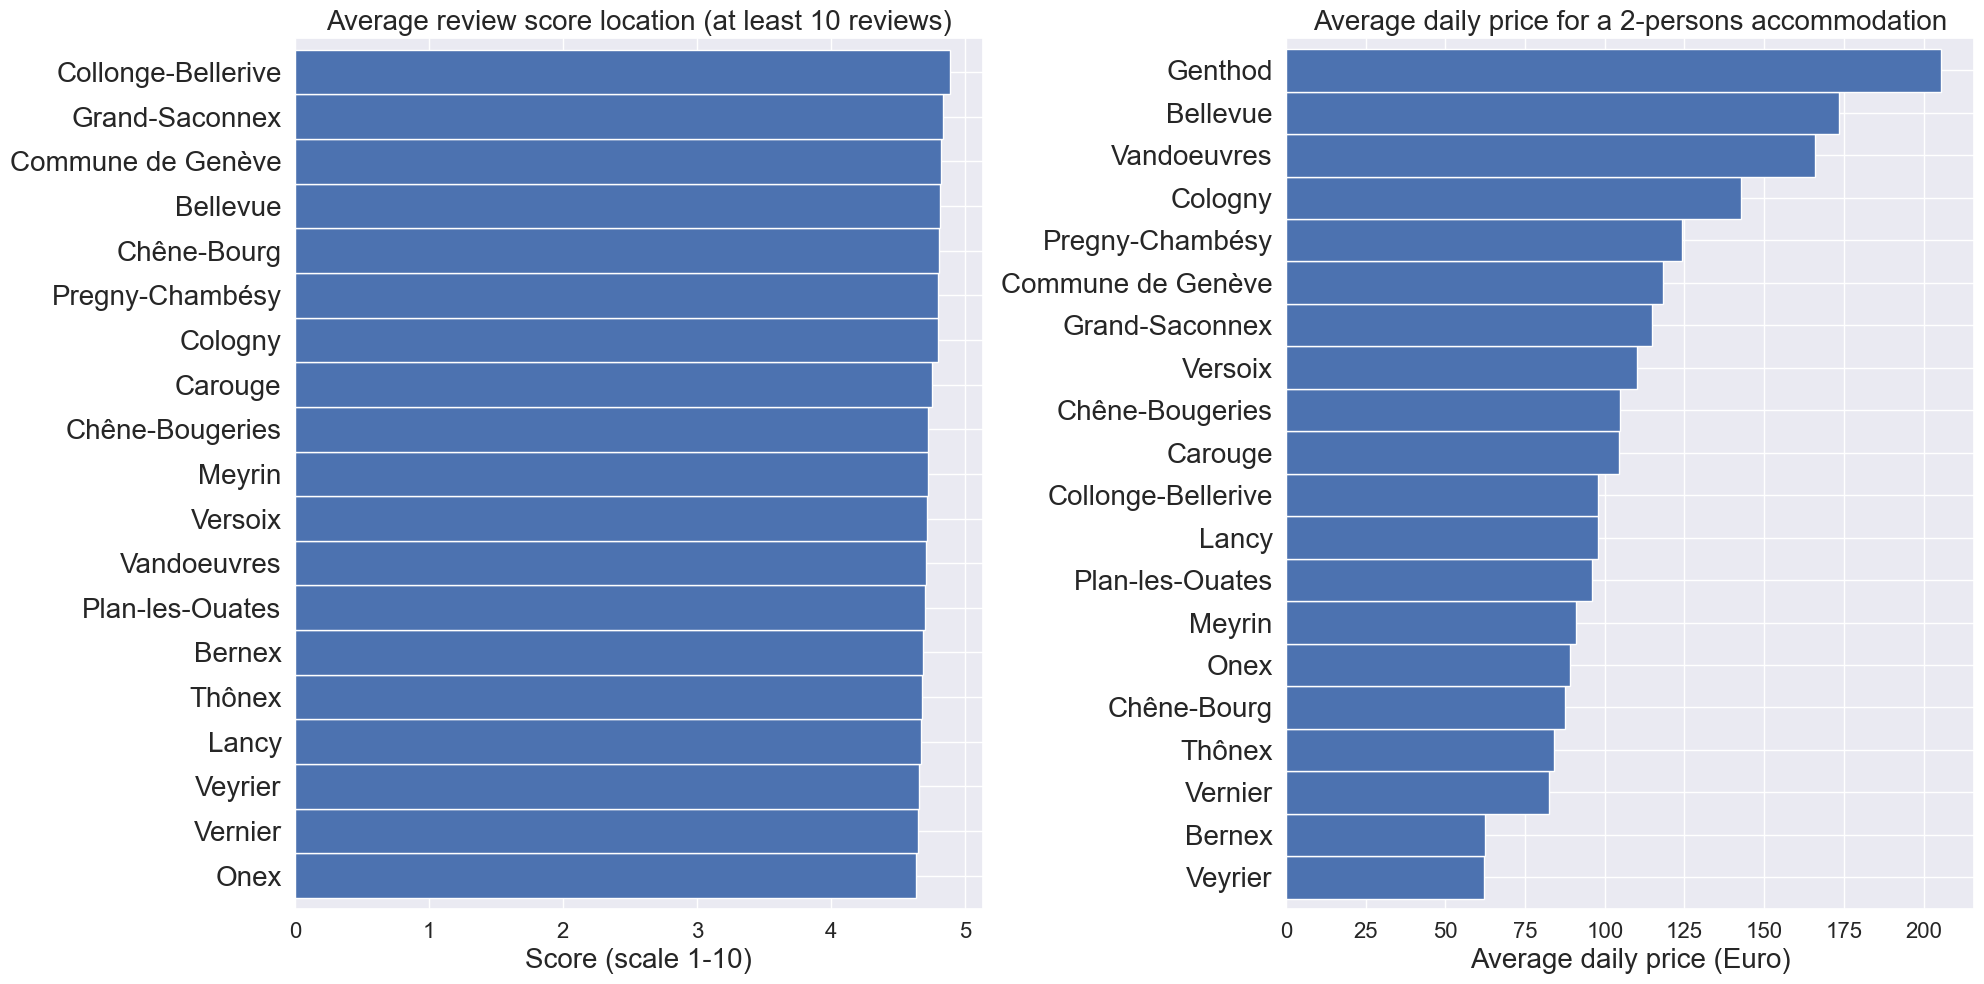

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = filtered_listings[filtered_listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = filtered_listings[filtered_listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

####
Luego de grafico anterior, podemos apreciar que la Commune con el precio promedio más alto Genthod (que se encuentra en la zona suburbana), tiene menos de 10 reviews en total en la comuna, por lo que no tenemos data suficiente para recomendar opciones de alojamiento en esa Commune.

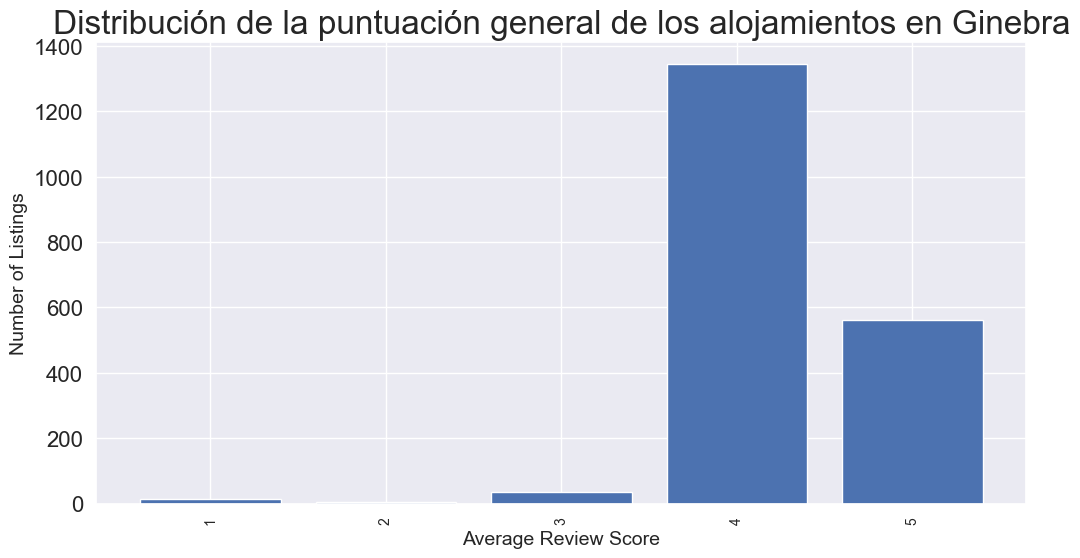

In [ ]:
# Paso 1: Redondear las puntuaciones al entero inferior
columns_to_round = [
    "review_scores_value", 
    "review_scores_cleanliness", 
    "review_scores_location", 
    "review_scores_accuracy", 
    "review_scores_communication", 
    "review_scores_checkin", 
    "review_scores_rating"
]

for column in columns_to_round:
    filtered_listings[f'rounded_{column}'] = filtered_listings[column].apply(np.floor)

# Paso 2: Contar la frecuencia de cada puntuación redondeada para 'review_scores_rating'
rating_counts = filtered_listings['rounded_review_scores_rating'].value_counts().sort_index()

# Paso 3: Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
rating_counts.plot(kind='bar', color='b', width=0.8, ax=ax)

# Paso 4: Configurar el gráfico
ax.set_title('Distribución de la puntuación general de los alojamientos en Ginebra', fontsize=24)
ax.set_xlabel('Average Review Score', fontsize=14)
ax.set_ylabel('Number of Listings', fontsize=14)
ax.set_xticks(np.arange(5))  # Asegurarse de que solo haya 5 categorías en el eje x (1, 2, 3, 4, 5)
ax.set_xticklabels([1, 2, 3, 4, 5], fontsize=10)

# Mostrar el gráfico
plt.show()


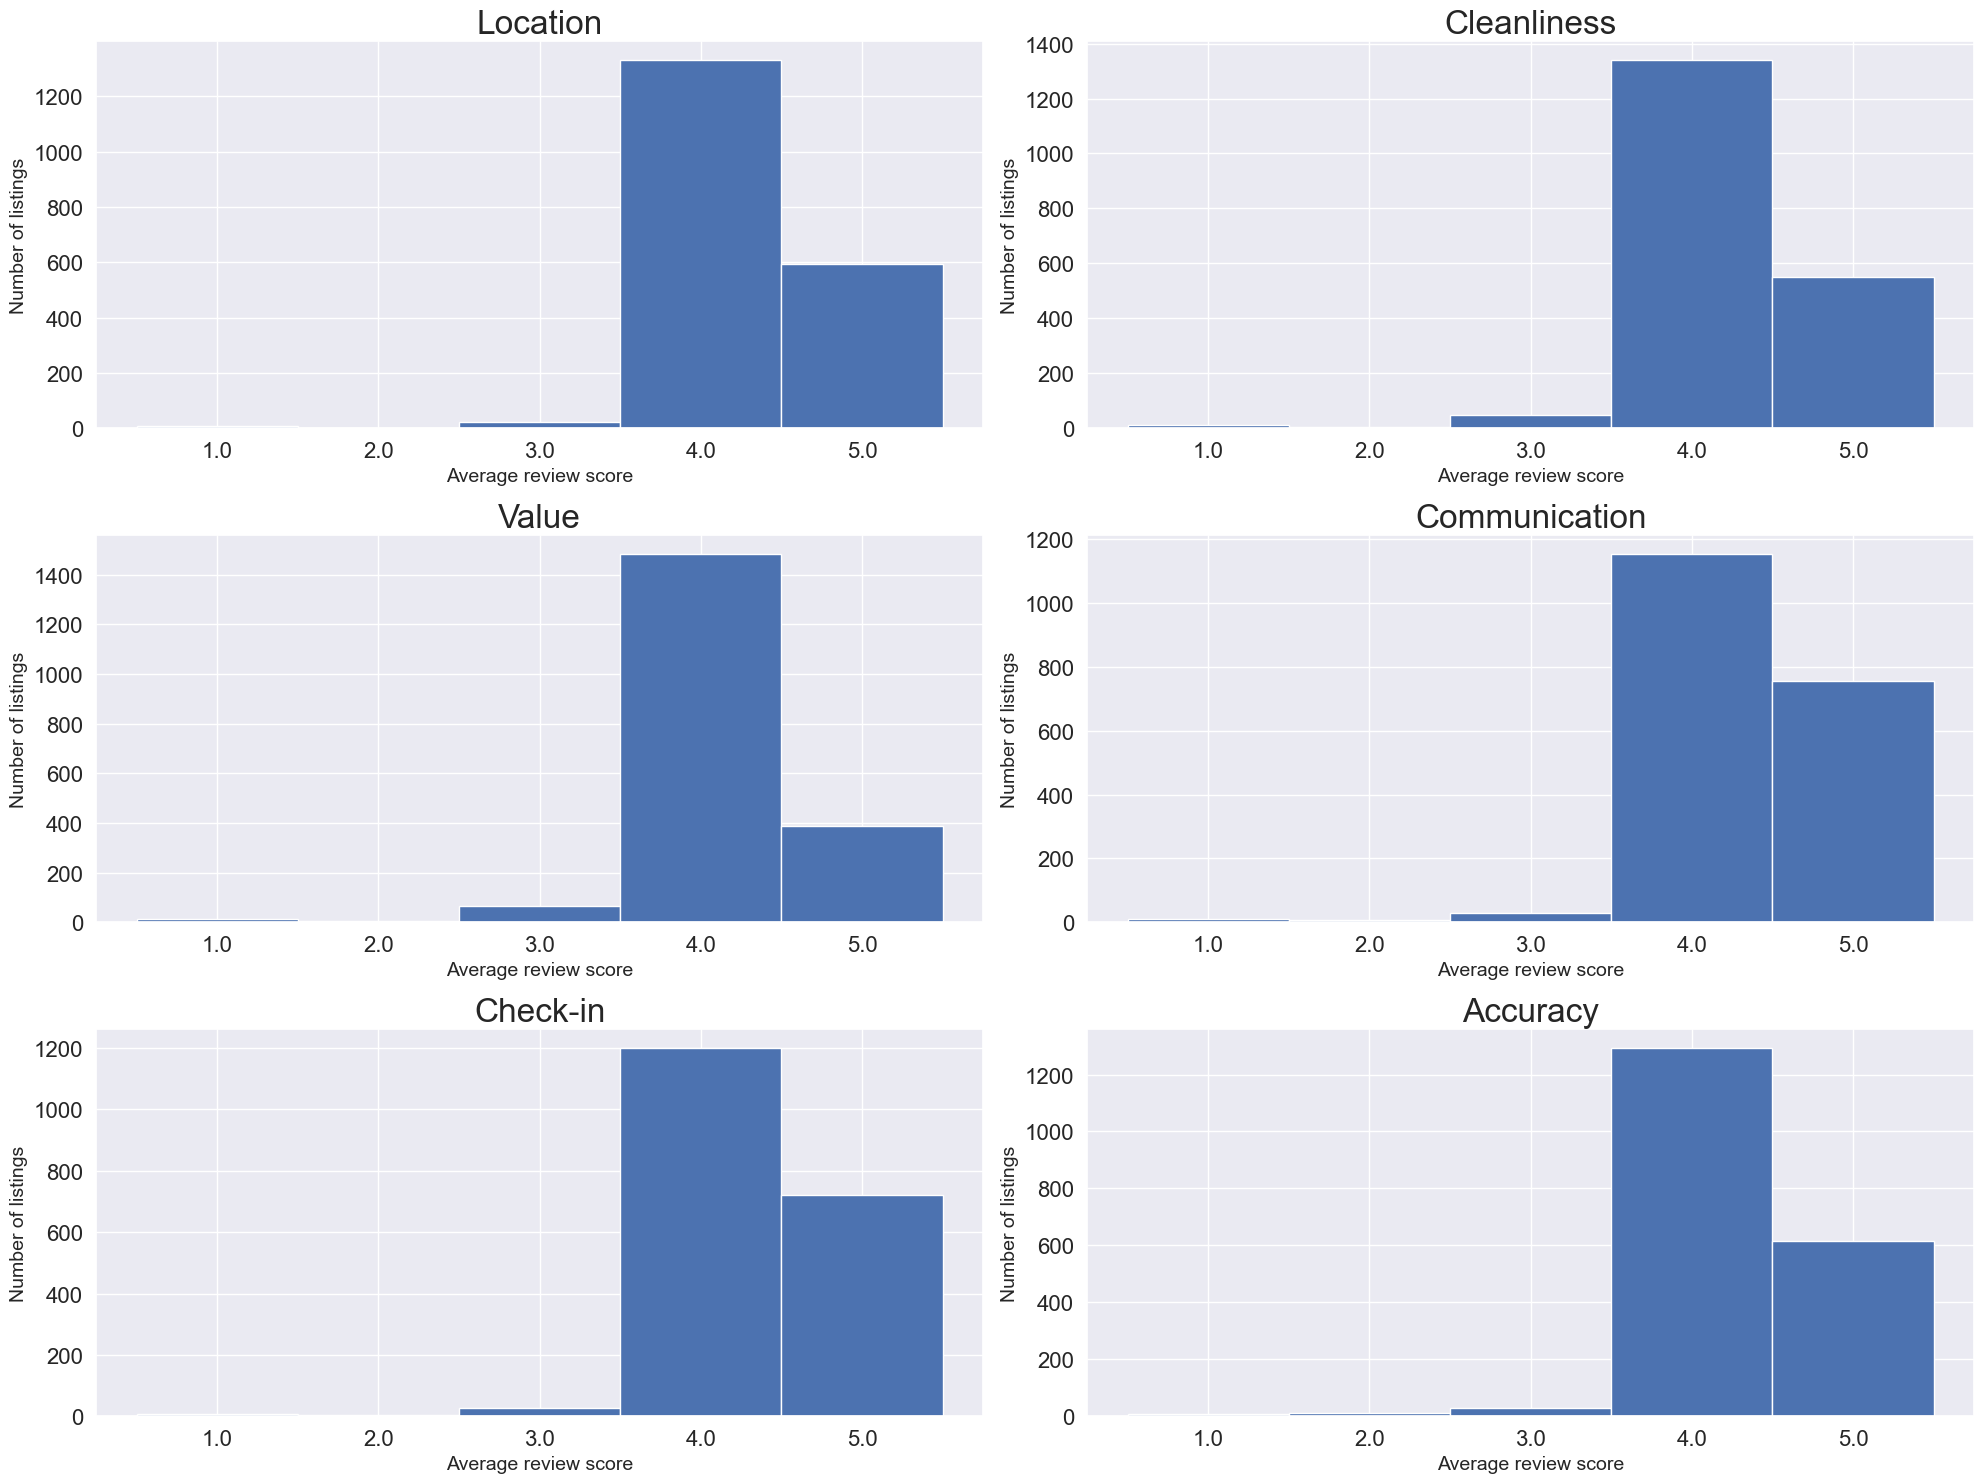

In [ ]:
# Paso 1: Redondear las puntuaciones al entero inferior
columns_to_round = [
    "review_scores_value", 
    "review_scores_cleanliness", 
    "review_scores_location", 
    "review_scores_accuracy", 
    "review_scores_communication", 
    "review_scores_checkin", 
    "review_scores_rating"
]

for column in columns_to_round:
    filtered_listings[f'rounded_{column}'] = filtered_listings[column].apply(np.floor)

# Paso 2: Crear los gráficos
fig = plt.figure(figsize=(20, 15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

# Helper function to plot each category
def plot_review_score(ax, data, title):
    feq = data.value_counts().sort_index()
    ax = feq.plot.bar(color='b', width=1, rot=0, ax=ax)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel('Number of listings', fontsize=14)
    ax.set_xlabel('Average review score', fontsize=14)
    return ax

ax1 = fig.add_subplot(321)
plot_review_score(ax1, filtered_listings['rounded_review_scores_location'], "Location")

ax2 = fig.add_subplot(322)
plot_review_score(ax2, filtered_listings['rounded_review_scores_cleanliness'], "Cleanliness")

ax3 = fig.add_subplot(323)
plot_review_score(ax3, filtered_listings['rounded_review_scores_value'], "Value")

ax4 = fig.add_subplot(324)
plot_review_score(ax4, filtered_listings['rounded_review_scores_communication'], "Communication")

ax5 = fig.add_subplot(325)
plot_review_score(ax5, filtered_listings['rounded_review_scores_checkin'], "Check-in")

ax6 = fig.add_subplot(326)
plot_review_score(ax6, filtered_listings['rounded_review_scores_accuracy'], "Accuracy")

plt.tight_layout()
plt.show()


####
Podemos apreciar que en los barrios con más de 5 alojamientos, las puntuaciones promedio son arriba de 4 estrellas, por qué pasa esto?

El podcast del Wall Street Journal(https://www.wsj.com/podcasts/your-money-matters/airbnb-ratings-do-five-stars-tell-the-whole-story/85e5f599-8f62-4611-bbd1-e8ac371e087d), presentado por J.R. Whalen, entrevisto a la reportera de viajes de TWJ, Allison Pohle, analiza la tendencia de las altas puntuaciones en las reseñas de Airbnb, destacando varios puntos clave:

1. **Generosidad de los Huéspedes**: Muchos huéspedes tienden a dar puntuaciones altas, incluso si su experiencia no fue perfecta, por razones de amabilidad o para no perjudicar al anfitrión. Esto resulta en un sesgo positivo en las calificaciones.

2. **Competitividad del Mercado**: El entorno de alquileres a corto plazo es altamente competitivo. Las calificaciones altas son esenciales para que los anfitriones se destaquen, ya que influyen en el algoritmo de búsqueda de Airbnb. Los "Superhosts" (anfitriones con una calificación promedio de al menos 4.8 estrellas) tienen una mayor visibilidad y potencial de ingresos.

3. **Relación con Airbnb**: Airbnb monitorea las calificaciones de los anfitriones. Aquellos con calificaciones bajas (entre una y tres estrellas) reciben alertas para mejorar, ya que la plataforma los penaliza si no lo hacen. Esto añade presión a los anfitriones para mantener calificaciones cercanas a cinco estrellas.

4. **Normas y Expectativas**: Aunque Airbnb prohíbe a los anfitriones pedir explícitamente cinco estrellas a cambio de beneficios, esta práctica sigue ocurriendo. Los anfitriones pueden usar tácticas sutiles, como dejar notas que expliquen la importancia de las calificaciones altas para ellos.

5. **Percepción del Huésped**: Las diferencias mínimas en las calificaciones pueden ser significativas para los anfitriones. Por ejemplo, un 4.7 frente a un 4.8 puede ser decisivo para mantener el estatus de Superhost. Los huéspedes, sin embargo, pueden tener dificultades para discernir estas pequeñas diferencias.

Para los huéspedes que buscan hacer reservas informadas, se recomienda leer detenidamente las reseñas, no solo fijarse en las estrellas, ya que las descripciones pueden contener indicios sobre problemas potenciales.

### Tendencias de Altas Puntuaciones en Airbnb

La tendencia de altas puntuaciones en Airbnb no es exclusiva de una región específica. A nivel global, los usuarios suelen otorgar calificaciones elevadas debido a la mencionada presión social y la percepción de cortesía. Esto puede llevar a una falta de honestidad en las reseñas, dificultando la evaluación real de la calidad del alojamiento.

### Situación en Suiza y Ginebra

En Suiza, esta tendencia se mantiene similar a la global. Las propiedades en estos lugares también muestran calificaciones promedio altas, generalmente superiores a cuatro estrellas. En ciudades con alto turismo como Ginebra, los anfitriones dependen en gran medida de las buenas calificaciones para atraer a más huéspedes y mantenerse competitivos.

Cabe destacar, que en Suiza, los estándares de hospitalidad suelen ser elevados, lo que puede contribuir a una mayor satisfacción del huésped y, por ende, a calificaciones más altas. Sin embargo, la presión para mantener calificaciones elevadas es igualmente significativa para los anfitriones suizos, que también están sujetos a las normas y expectativas de Airbnb.

### Conclusión

Las calificaciones altas en Airbnb son una tendencia influenciada por la competitividad del mercado, la presión sobre los anfitriones y la generosidad de los huéspedes. Este fenómeno, observado tanto en EE.UU. como en Europa, implica que los usuarios deben ser críticos y analíticos al leer las reseñas, buscando detalles en los comentarios que puedan indicar la verdadera calidad del alojamiento.
